# Statistics of cluster stoichiometry

Author: Isabel Llorente-Garcia, UCL Physics and Astronomy. Sept 2020.

Import the necessary libraries:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl               # needed to set global font size for plots later.
from scipy.stats import poisson        # for working with Poisson distribution
from scipy.stats import norm           # for working with the normal/Gaussian distribution   
from IPython.display import Image      # to display online images
import pandas as pd  
# Set global font size for plots:
mpl.rcParams['font.size'] = 14

### Looking at clusters of CD4 receptors on SupT1 cells (T cells).

### 1. CD4 density on SupT1 cells:
(See our emails with subject "CD4 density" in May 2020)

From **references**:

**[1]** Differential Endocytosis of CD4 in Lymphocytic and Nonlymphocytic Cells, Annegret Pelchen-Matthews, Jane E. Armes, Gareth Griffiths,and Mark Marsh. J. Exp. Med. 173, 575-587 (1991),

**[2]** Quantification of CD4, CCR5, and CXCR4 levels on lymphocyte subsets, dendritic cells, and differ-
entially conditioned monocyte-derived macrophages, B. Lee, M. Sharron, L.J. Montaner, D. Weissman, R.W. Doms. Proc. Natl. Acad. Sci. 96 (9), 5215–5220 (1999),

we find  **~100,000 CD4 molecules per cell**.

In **[1]**, I understand that the surface area mentioned (for one cell) for the $10^5$ receptors was $326~\mu\mathrm{m}^2$, so that the number of molecules per unit area (area density) is $\sim 300~\mathrm{molecs}/\mu\mathrm{m}^2$:

In [2]:
1e5/326

306.7484662576687

If we consider in general from **[1]** and **[2]** ~100,000 CD4 molecules per cell, and a cell with radius $r \sim 10\mu\mathrm{m}$ (cell approximated as a ~flat disk with total surface area ~$2\times \pi r^2 = 630~\mu\mathrm{m}^2$), we would get instead $\sim 160~\mathrm{molecs}/\mu\mathrm{m}^2$, of same order of magnitude as the previous number.

In [3]:
1e5/(2*np.pi*10**2)

159.15494309189535

Approximating the T cell as a sphere instead of a flat disk, we would get $\sim 80~\mathrm{molecs}/\mu\mathrm{m}^2$:

In [4]:
1e5/(4*np.pi*10**2)

79.57747154594767

Therefore, we can say that the **surface density of CD4 receptors in SupT1 cells** is in the range $\sim 100-300~\mathrm{molecs}/\mu\mathrm{m}^2$, and we can use the mid-point, $\sim 200~\mathrm{molecs}/\mu\mathrm{m}^2$.

In [5]:
n = 200    # whole-cell average surface density of CD4 (molecs/um^2).

### 2. Poisson probability distributions

If we consider the previous value as an average uniform density of CD4 receptors, $n\sim 200~\mathrm{molecs}/\mu\mathrm{m}^2$, then the expected probability of observing a number of receptors $k$ in a given area of the cell surface is given by the **Poisson probability distribution**, $P(k;\lambda)$, where $\lambda$ is the mean of the Poisson distribution (the standard deviation is $\sqrt{\lambda}$). The Poisson distribution is **discrete** and it is more **asymmetrical** for lower values of $\lambda$. The values $k$ (counts) are integers $k\geq0$. The mean value $\lambda$ does not have to be an integer (averaged over a large area).  

The Poisson distribution here describes counting of independent rare events (finding a receptor on a portion of the cell surface) that occurr within a fixed interval of space (area) when over a large length scale (whole cell), on average, there is a constant number of counts/receptors per unit area (our $n$ value).

This assumes of course no interactions between receptors, no signalling or active processes, no receptor diffusion, etc., i.e., this assumes that each receptor has a fixed independent probability of being at a place in the membrane. Therefore, when we count more than one receptor in a small area, this is due to random statistical fluctuations, to chance.

Now, our imaged **CD4 clusters have different sizes on the membrane** and we can consider them as flat circular areas. 



If we consider a **membrane area** (cluster size) of **100 nm in diameter** (r=0.05um), the surface area is $A = \pi r^2 \approx 0.008~\mu\mathrm{m}^2$. 

Given our whole-cell value of the CD4 density, $n$, for the area $A$ we would expect to count on average a number of receptors $\lambda = n A \approx 1.6$ (see below): 

In [6]:
r1 = 0.05            # radius of cluster in um.
a1 = np.pi*r1**2     # cluster area where receptors are counted
mean1 = n*a1         # mean no. of receptors counted in area a1

print(f"Cluster area where receptors are counted A1(um^2) = {a1:.4f}")
print(f"Mean no. of receptors counted in area A1 is {mean1:.2f}")

Cluster area where receptors are counted A1(um^2) = 0.0079
Mean no. of receptors counted in area A1 is 1.57


If instead we use a smaller cluster size of **50 nm diameter** (r=0.025um), we would expect to count on average a number of receptors $\lambda \approx 0.4$:

In [7]:
r2 = 0.025           # radius of cluster in um.
a2 = np.pi*r2**2     # cluster area where receptors are counted
mean2 = n*a2         # mean no. of receptors counted in area a2

print(f"Cluster area where receptors are counted A2(um^2) = {a2:.4f}")
print(f"Mean no. of receptors counted in area A2 is {mean2:.2f}")

Cluster area where receptors are counted A2(um^2) = 0.0020
Mean no. of receptors counted in area A2 is 0.39


If instead we use a larger cluster size of **200 nm diameter** (r=0.1 um), we would expect to count on average a number of receptors $\lambda \approx 6.3$:

In [8]:
r3 = 0.1             # radius of cluster in um.
a3 = np.pi*r3**2     # cluster area where receptors are counted
mean3 = n*a3         # mean no. of receptors counted in area a3

print(f"Cluster area where receptors are counted A3(um^2) = {a3:.4f}")
print(f"Mean no. of receptors counted in area A3 is {mean3:.2f}")

Cluster area where receptors are counted A3(um^2) = 0.0314
Mean no. of receptors counted in area A3 is 6.28


Our different clusters measured have different sizes (surface areas). We have a reasonably large distribution of cluster sizes, **from tens of nm to ~150 nm, with mean around 75nm**. **The shape of the Poisson distribution changes significantly for these different cluster sizes**, considering our value of $n$ (see plots below).

The expected mean values $\lambda_i$ for the different cluster sizes can be used to predict the probability distribution of measured counts (numbers of receptors) in a given area, for the different cluster sizes.

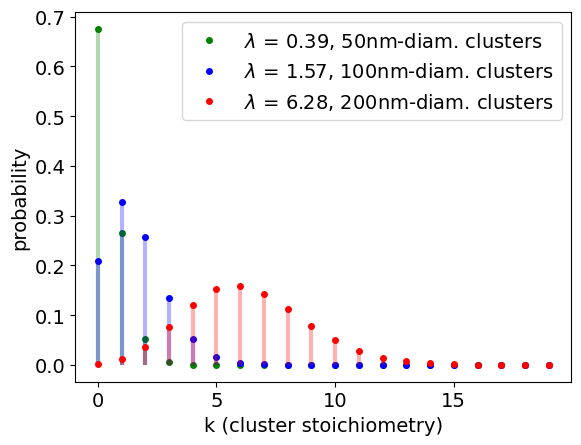

In [9]:
# Plotting Poisson distributions in order of lambda:
k_list = np.arange(0,20)
fig, ax = plt.subplots(1, 1)

# lambda = 0.4 (50nm-diameter clusters):
ax.plot(k_list, poisson.pmf(k_list, mean2), 'go', ms=4, label=r'$\lambda$ = {0:.2f}, 50nm-diam. clusters'.format(mean2))
ax.vlines(k_list, 0, poisson.pmf(k_list, mean2), colors='g', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability

# lambda = 1.6 (100nm-diameter clusters):
ax.plot(k_list, poisson.pmf(k_list, mean1), 'bo', ms=4, label=r'$\lambda$ = {0:.2f}, 100nm-diam. clusters'.format(mean1))
ax.vlines(k_list, 0, poisson.pmf(k_list, mean1), colors='b', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability

# lambda = 6.3 (200nm-diameter clusters):
ax.plot(k_list, poisson.pmf(k_list, mean3), 'ro', ms=4, label=r'$\lambda$ = {0:.2f}, 200nm-diam. clusters'.format(mean3))
ax.vlines(k_list, 0, poisson.pmf(k_list, mean3), colors='r', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability

ax.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax.legend(loc="best")

The Poisson distribution is strongly asymmetrical for low values of the mean $\lambda$. This is consistent with our measured distribution of stoichiometry with most cluster sizes below ~150nm, so $\lambda<2$.

Note that in our measurements we never measure $k =0$ (zero receptors), so we would compare our measured stoichiometry distribution (probabilities) to our Poisson distributions for $k\geq 0$.

**Calculating the expected stoichiometry probability distribution**:
The expected distribution of cluster stoichiometry (for an average receptor density $n$) would be the average of the Poisson distributions corresponding to all our observed cluster sizes (areas of radii $r_i$). The probability of observing $k$ receptors given our various cluster sizes would be:

$$P(k) = \frac{1}{N}\sum_i P(k; \lambda_i) = \frac{1}{N}\sum_i P(k; \pi r_i^2 n) \,,$$

where we are summing over all the different clusters ($i$ is the cluster index), $P(k;\lambda_i)$ is the Poisson distribution for a given cluster $i$ with radius $r_i$ (that occupies a surface area $A_i = \pi r_i^2$), $\lambda_i = n A_i = \pi r_i^2 n$ is the corresponding mean value of the Poisson distribution for cluster area $A_i$, and $N$ is the total number of clusters measured. (If all the clusters had the same size and same $\lambda$ we would just have $P(k;\lambda)$). Given our cluster sizes, the resulting probability distribution will be close to a Poisson distribution with $\lambda \sim 1$.

For instance, adding up three Poisson distributions for cluster sizes 50, 75 and 100nm, we would get:

In [10]:
cluster_diam = np.array([0.05, 0.075, 0.1])  # list of cluster diameters in um.
n = 200              # whole-cell average surface density of CD4 (molecs/um^2).
k_list = np.arange(0,20)  # start at k=0, although we only measure for k>0 as we only measure in areas with receptors.

In [11]:
def exp_Poisson(cluster_diameter, density, counts):                     
    '''Function to calculate expected Poisson probability distribution for many cluster sizes.
    Inputs: cluster_diameter: measured diameter/s of receptor cluster/s in microns; 
    density: overall density of receptors in whole cell (molecules/um^2);
    counts: range of counts (numbers of receptors), list of predicted cluster stoichiometry values (integers).
    Output: expected Poisson probability distribution.'''
    
    N = len(cluster_diameter)  # number of clusters
    # Calculate cluster area (assume 2D circular areas) in um^2 where receptors are counted:
    area = np.pi*(cluster_diameter/2)**2 
    # Calculate mean numbers of receptors counted in receptor areas (lambda parameters for Poisson distribs):
    mean_num = density*area 
    
    prob = np.zeros(len(counts))      # initialise array of zeroes to accummulate Poisson probabilities from all clusters
    for i in range(len(mean_num)):    # loop through clusters
        prob = prob + poisson.pmf(counts, mean_num[i])  # add Poisson probabilities for cluster size i    
    return prob/N   # averaged probability distribution

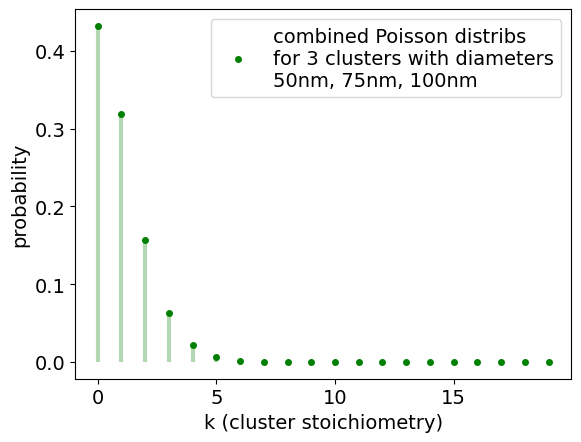

In [12]:
theor_poisson = exp_Poisson(cluster_diam, n, k_list)

# Plotting total expected Poisson distribution for the various cluster sizes:
fig, ax = plt.subplots(1, 1)
ax.plot(k_list, theor_poisson, 'go', ms=4, label='combined Poisson distribs\nfor 3 clusters with diameters\n50nm, 75nm, 100nm ')
ax.vlines(k_list, 0, theor_poisson, colors='g', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability
ax.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax.legend(loc="best")

In [13]:
np.sum(theor_poisson)  # total probability is ~1

0.9999999999999997

This would be the cluster stoichiometry probability distribution expected when counting receptors in 3 different areas with diameters 50nm, 75nm and 100nm and assumming an overall uniform receptor density $n$. 

**We could predict the cluster stoichiometry distribution expected for our measured cluster sizes**, simply using as input to the function our list of cluster diameters.

Then we can **compare that to our measured cluster stoichiometry distributions**:
 - with **no virus**, if our distribution differs from the expected one (with larger probability for larger $k$), that can indicate that there is **pre-clustering of CD4 receptors** on the cell surface.
 - **with virus or gp120**, a discrepancy between the expected and measured distributions is a clear indication of **clustering induced by the virus/gp120**. 

This way, we can say if our observed numbers of receptors per cluster differ significantly from the expected overall Poisson distribution before/after the virus.

If we want, we could also do a $\chi^2$ statistical hypothesis test to test if our measured distributions are consistent with the expected one.

**Careful**: One thing we might need to be careful with is that we never measure areas with no receptors in our experiments (so we don't have a measured probability for zero counts), which means that we should be careful with how we normalise our histograms when comparing measured and expected.

### 3. Analysing experimental data

Chosen average density of receptor molecules over entire cell, for calculating theoretical stoichiometry distributions:

In [14]:
n = 100               # whole-cell average surface density of CD4 (molecs/um^2).

Data for clusters of CD4 receptors from SR measurements (Ricardo Henriques group).

In [15]:
data_path = "RH_data/cluster_size_molec_numbers_data.xlsx"    # file path

In [16]:
# Read data from each sheet in the Excel file:
xls = pd.ExcelFile(data_path)
# Sheet names:
sheet_1 = 'untreated cell(Figure 1)'
sheet_2 = '15min PMA (Figure 2 light blue)'
sheet_3 = '1min HIV (Figure 3 green bar)'
# Read sheets:
data_1 = pd.read_excel(xls, sheet_1)
data_2 = pd.read_excel(xls, sheet_2)
data_3 = pd.read_excel(xls, sheet_3)

In [17]:
#To display the entire data frame (can scroll):
pd.set_option('display.max_rows', 12000)   # set above max no. of rows
pd.set_option('display.max_columns', 500)  # set above max no. of columns
pd.set_option('display.width', 1000)

In [19]:
#data_1

In [20]:
#data_2

In [21]:
#data_3

In [22]:
[data_1.shape, data_2.shape, data_3.shape]

[(11338, 2), (7643, 2), (9123, 2)]

In [23]:
[data_1.columns, data_2.columns, data_3.columns]

[Index(['Diameter (nm)', 'number of molecules'], dtype='object'),
 Index(['Diameter (nm)', 'number of molecules'], dtype='object'),
 Index(['Diameter (nm)', 'number of molecules'], dtype='object')]

In [24]:
[data_1.index, data_2.index, data_3.index]

[RangeIndex(start=0, stop=11338, step=1),
 RangeIndex(start=0, stop=7643, step=1),
 RangeIndex(start=0, stop=9123, step=1)]

In [25]:
# Define easy variables (strings) for column names for faster use:
diam = data_1.columns[0]    
N = data_1.columns[1]

In [26]:
data_1[0:5]

,Diameter (nm),number of molecules
0,9.101230,1
1,89.400891,5
2,72.787225,2
3,76.929106,3
4,22.066347,1


In [27]:
# Checking that all are numbers, class:
[type(data_1.loc[0,diam]), type(data_1.loc[0,N])]

[numpy.float64, numpy.int64]

Calculate area of cluster and density of molecules in cluster and append as new columns:

In [28]:
# Variable names for columns:
area = "Area (um^2)"
density = "num. molecs/um^2"

# Add new columns:
data_1[area] = 1e-6*np.pi*(data_1[diam]/2)**2   # area of cluster in micron^2 assuming circular cluster
data_1[density] = data_1[N]/data_1[area]        # number density, no. of molecs per micron^2

# Same for data_2 and data_3:
data_2[area] = 1e-6*np.pi*(data_2[diam]/2)**2   # area of cluster in micron^2 assuming circular cluster
data_2[density] = data_2[N]/data_2[area]        # number density, no. of molecs per micron^2

data_3[area] = 1e-6*np.pi*(data_3[diam]/2)**2   # area of cluster in micron^2 assuming circular cluster
data_3[density] = data_3[N]/data_3[area]        # number density, no. of molecs per micron^2

In [29]:
#data_1

Calculate expected stoichiometry probability distribution from measured cluster sizes:

In [30]:
k_list = np.arange(0,200)  # predicted number of molecules per cluster, horiz axis of Poisson distrib.
# k_list needs to go to a large enough number >50-100 for the predicted Poisson distrib to be normalised.
# start at k=0, although we only measure for k>0 as we only measure in areas with receptors.
# Will have to normalise excluding k = 0 later on.

# Lists of cluster diameters in microns:
cluster_diam_1 = data_1[diam] * 1.0e-3  
cluster_diam_2 = data_2[diam] * 1.0e-3 
cluster_diam_3 = data_3[diam] * 1.0e-3 
# Use function exp_Poisson(cluster_diameter, density, counts) (see above)
# to calculate expected Poisson prob. distribution for many cluster sizes.
# Inputs: cluster_diameter: measured diameter/s of receptor cluster/s in microns; 
# density: overall density of receptors in whole cell (molecules/um^2);
# counts: range of counts (numbers of receptors), list of predicted cluster stoichiometry values (integers).
# Output: expected Poisson probability distribution.'''

#### Predicted Poisson distribution for untreated cell (Fig. 1):

In [31]:
theor_poisson_1 = exp_Poisson(cluster_diam_1, n, k_list)
print(np.sum(theor_poisson_1))  # total probability is ~1 (within ~machine precision)
#print(theor_poisson_1) 

1.0000000000000007


In [32]:
np.finfo(float).eps  # machine precision

2.220446049250313e-16

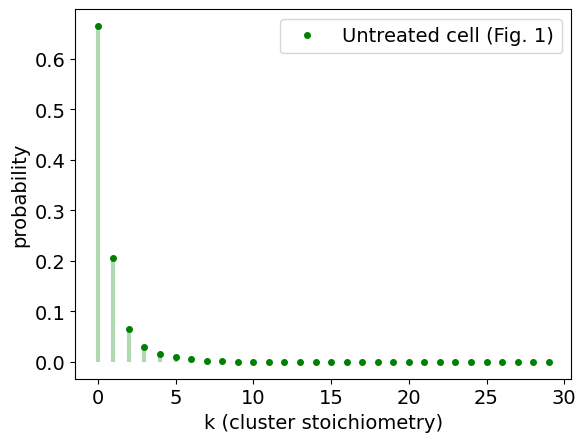

In [33]:
# Plotting total expected Poisson distribution for the various cluster sizes:
fig1, ax1 = plt.subplots(1, 1)
# Plot only first 30 points:
npoints = 30
ax1.plot(k_list[0:npoints], theor_poisson_1[0:npoints], 'go', ms=4, label='Untreated cell (Fig. 1)')
ax1.vlines(k_list[0:npoints], 0, theor_poisson_1[0:npoints], colors='g', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax1.legend(loc="best")

#### Predicted Poisson distribution for 15min PMA (Figure 2, light blue):

In [34]:
theor_poisson_2 = exp_Poisson(cluster_diam_2, n, k_list)
print(np.sum(theor_poisson_2))  # total probability is ~1 (within ~ machine precision)
#print(theor_poisson_2) 

0.9999999999999972


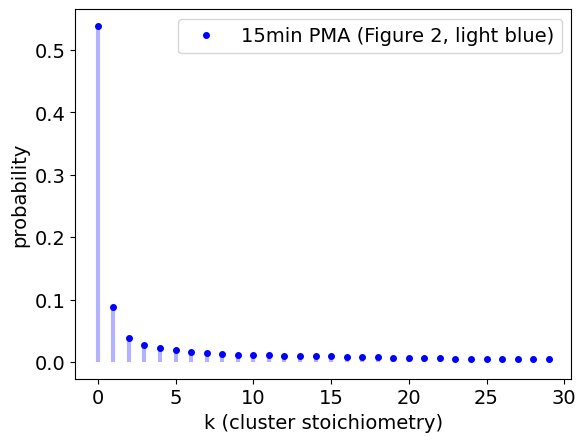

In [35]:
# Plotting total expected Poisson distribution for the various cluster sizes:
fig2, ax2 = plt.subplots(1, 1)
# Plot only first 30 points:
npoints = 30
ax2.plot(k_list[0:npoints], theor_poisson_2[0:npoints], 'bo', ms=4, label='15min PMA (Figure 2, light blue)')
ax2.vlines(k_list[0:npoints], 0, theor_poisson_2[0:npoints], colors='b', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax2.legend(loc="best")

#### Predicted Poisson distribution for 1min HIV (Figure 3 green bar):

In [36]:
theor_poisson_3 = exp_Poisson(cluster_diam_3, n, k_list)
print(np.sum(theor_poisson_3))  # total probability is ~1 (within ~ machine precision)
#print(theor_poisson_3) 

1.0000000000000007


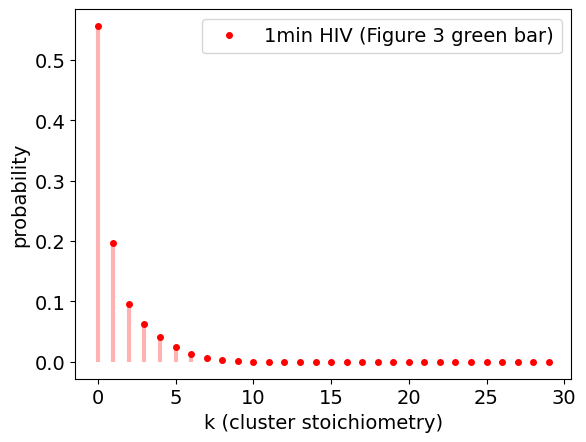

In [37]:
# Plotting total expected Poisson distribution for the various cluster sizes:
fig3, ax3 = plt.subplots(1, 1)
# Plot only first 30 points:
npoints = 30
ax3.plot(k_list[0:npoints], theor_poisson_3[0:npoints], 'ro', ms=4, label='1min HIV (Figure 3 green bar)')
ax3.vlines(k_list[0:npoints], 0, theor_poisson_3[0:npoints], colors='r', lw=3, alpha=0.3)  # add vertical lines between y=0 and y= value of Poisson probability
ax3.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax3.legend(loc="best")

### Normalising to exclude k = 0 (we exclude all areas with zero molecules), the predicted stoichiometry histograms are:

In [38]:
# Exclude first point (k = 0 molecules) and re-normalise by dividing by sum of remaining values:
theor_poisson_bis_1 = theor_poisson_1[1:]/np.sum(theor_poisson_1[1:]) 
theor_poisson_bis_2 = theor_poisson_2[1:]/np.sum(theor_poisson_2[1:]) 
theor_poisson_bis_3 = theor_poisson_3[1:]/np.sum(theor_poisson_3[1:]) 
# Check that the distributions are normalised:
print([np.sum(theor_poisson_bis_1), np.sum(theor_poisson_bis_2), np.sum(theor_poisson_bis_3)])

[1.0, 1.0000000000000002, 1.0]


Plotting the re-normalised expected stoichiometry distributions (excluding 0 molecules):

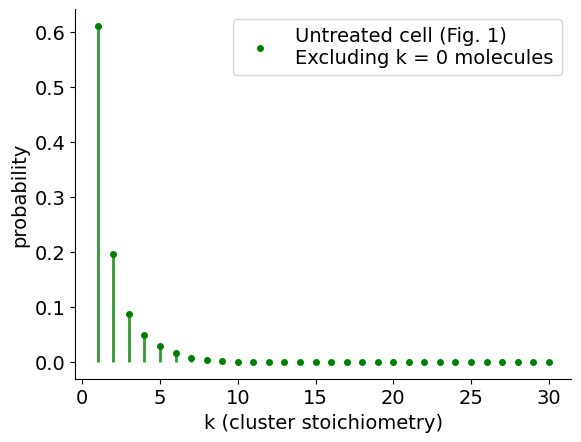

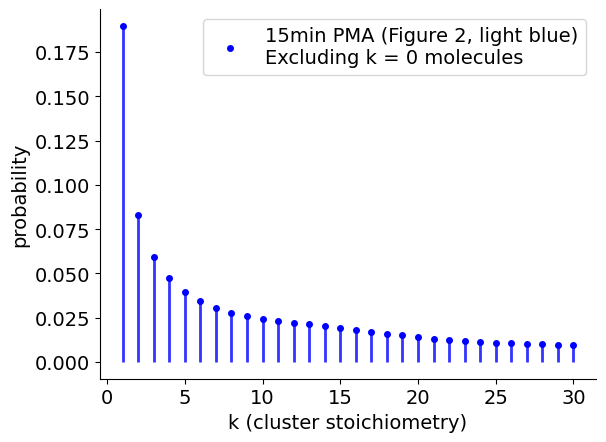

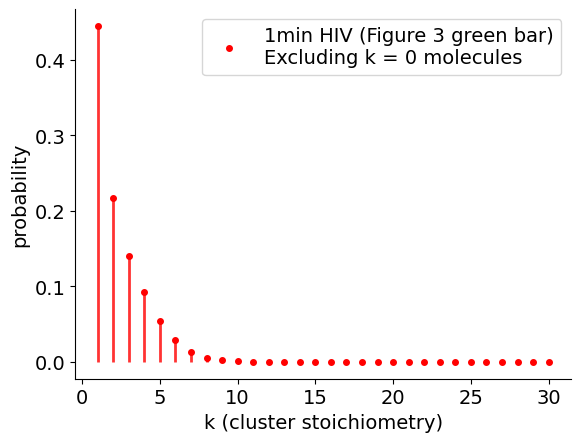

In [39]:
# Plotting total expected Poisson distribution for the various cluster sizes:
k_list_bis = k_list[1:]   # Adjust k_list to remove k=0 for plots
# Plot only first 30 points:
npoints = 30

fig1, ax1 = plt.subplots(1, 1)
plt.plot(k_list_bis[0:npoints], theor_poisson_bis_1[0:npoints], 'go', ms=4, label='Untreated cell (Fig. 1)\nExcluding k = 0 molecules')
plt.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_1[0:npoints], colors='g', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
plt.xlabel("k (cluster stoichiometry)")
plt.ylabel("probability")
plt.legend(loc="best")
ax1.spines['top'].set_visible(False)     # remove top part of frame
ax1.spines['right'].set_visible(False)   # remove right part of frame

fig2, ax2= plt.subplots(1, 1)
ax2.plot(k_list_bis[0:npoints], theor_poisson_bis_2[0:npoints], 'bo', ms=4, label='15min PMA (Figure 2, light blue)\nExcluding k = 0 molecules')
ax2.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_2[0:npoints], colors='b', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
plt.xlabel("k (cluster stoichiometry)")
plt.ylabel("probability")
plt.legend(loc="best")
ax2.spines['top'].set_visible(False)     # remove top part of frame
ax2.spines['right'].set_visible(False)   # remove right part of frame

fig3, ax3 = plt.subplots(1, 1)
ax3.plot(k_list_bis[0:npoints], theor_poisson_bis_3[0:npoints], 'ro', ms=4, label='1min HIV (Figure 3 green bar)\nExcluding k = 0 molecules')
ax3.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_3[0:npoints], colors='r', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
plt.xlabel("k (cluster stoichiometry)")
plt.ylabel("probability")
plt.legend(loc="best")
ax3.spines['top'].set_visible(False)     # remove top part of frame
ax3.spines['right'].set_visible(False)   # remove right part of frame

The "bump" around k=5 molecules for the HIV data (red) arises because we have a higher number of larger clusters than for the other data sets (the Poisson distribution has peak at higher k).

### Comparing theoretical and measured stoichiometry histograms:

After normalising, we can compare the expected and experimental probability distributions of stoichiometry (both exclude k = 0 molecules).

The lists of **measured** numbers of molecules per cluster (stoichiometry) are:

In [40]:
n_1 = data_1[N]
n_2 = data_2[N]
n_3 = data_3[N] 

We can use use **np.unique** to obtain the corresponding occurrences for each measured stoichiometry value, and normalise dividing by the total number of occurrences to obtain probability:

In [41]:
# Find unique values and their number of occurrences:
unique_1, counts_1 = np.unique(n_1, return_counts=True)    
unique_2, counts_2 = np.unique(n_2, return_counts=True)    
unique_3, counts_3 = np.unique(n_3, return_counts=True)    

# Convert to normalised probability (excludes k = 0 molecules):
experim_Poisson_1 = counts_1/np.sum(counts_1)
experim_Poisson_2 = counts_2/np.sum(counts_2)
experim_Poisson_3 = counts_3/np.sum(counts_3)

print([np.sum(experim_Poisson_1), np.sum(experim_Poisson_2), np.sum(experim_Poisson_3)]) # check normalisation

[1.0, 1.0, 0.9999999999999999]


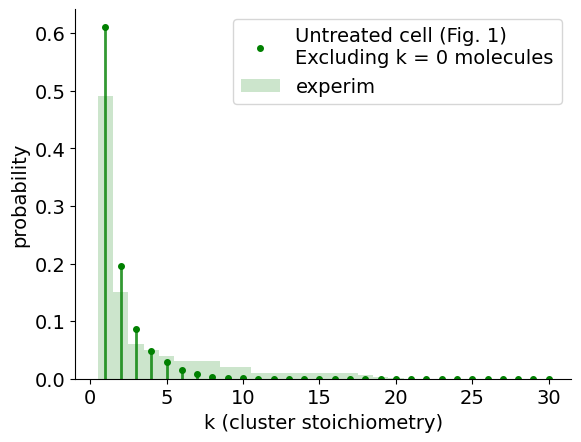

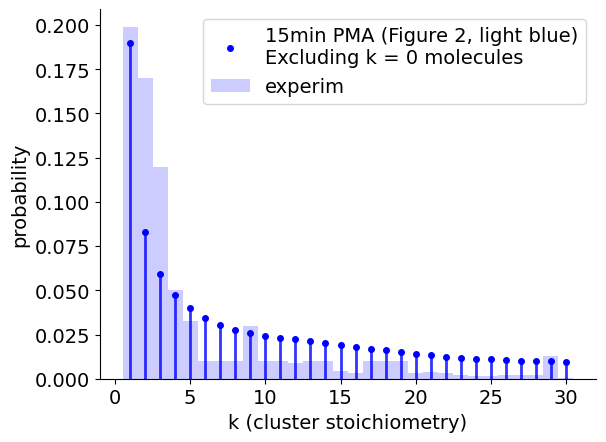

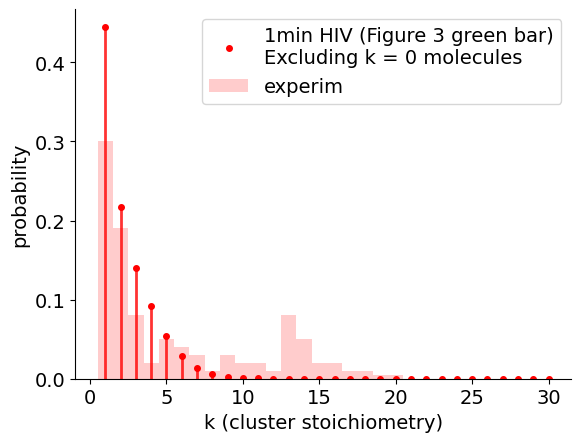

In [42]:
# Plot only first 30 points:
npoints = 30 

fig4, ax4 = plt.subplots(1, 1)
ax4.plot(k_list_bis[0:npoints], theor_poisson_bis_1[0:npoints], 'go', ms=4, label='Untreated cell (Fig. 1)\nExcluding k = 0 molecules')
ax4.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_1[0:npoints], colors='g', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax4.bar(unique_1, experim_Poisson_1, width=1, alpha=0.2, color='green', label="experim")
ax4.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax4.legend(loc="best")
ax4.spines['top'].set_visible(False)     # remove top part of frame
ax4.spines['right'].set_visible(False)   # remove right part of frame

fig5, ax5= plt.subplots(1, 1)
ax5.plot(k_list_bis[0:npoints], theor_poisson_bis_2[0:npoints], 'bo', ms=4, label='15min PMA (Figure 2, light blue)\nExcluding k = 0 molecules')
ax5.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_2[0:npoints], colors='b', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax5.bar(unique_2[0:npoints], experim_Poisson_2[0:npoints], width=1, alpha=0.2, color='blue', label="experim")
ax5.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax5.legend(loc="best")
ax5.spines['top'].set_visible(False)     # remove top part of frame
ax5.spines['right'].set_visible(False)   # remove right part of frame

fig6, ax6 = plt.subplots(1, 1)
ax6.plot(k_list_bis[0:npoints], theor_poisson_bis_3[0:npoints], 'ro', ms=4, label='1min HIV (Figure 3 green bar)\nExcluding k = 0 molecules')
ax6.vlines(k_list_bis[0:npoints], 0, theor_poisson_bis_3[0:npoints], colors='r', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax6.bar(unique_3, experim_Poisson_3, width=1, alpha=0.2, color='red', label="experim")
ax6.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax6.legend(loc="best")
ax6.spines['top'].set_visible(False)     # remove top part of frame
ax6.spines['right'].set_visible(False)   # remove right part of frame

**Plotting occurrences instead of probability:**
(can plot also on same vertical scale)

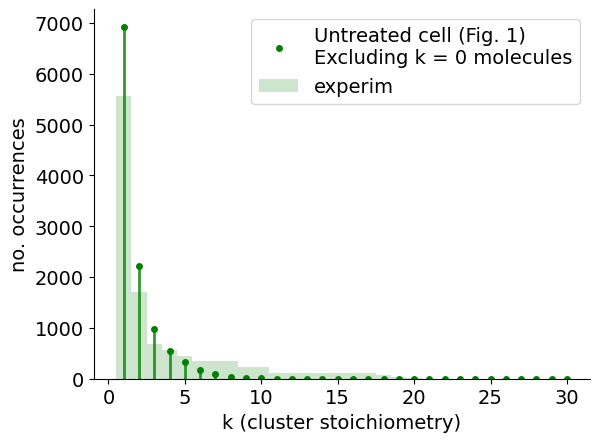

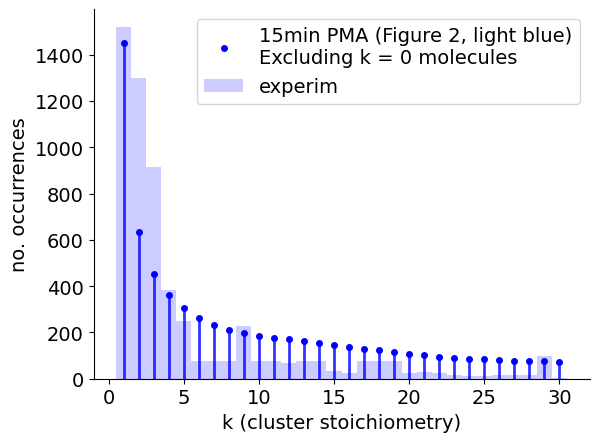

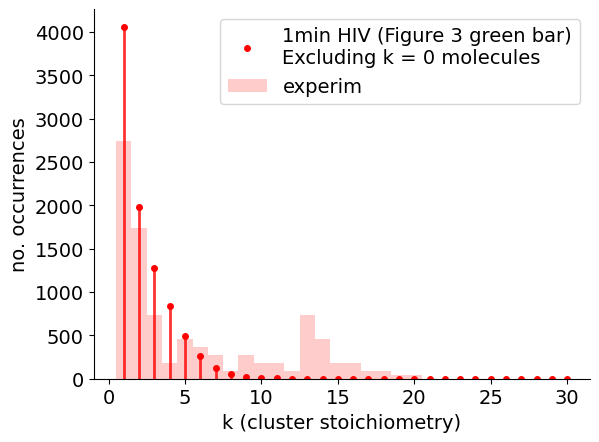

In [43]:
# Plot only first 30 points:
npoints = 30 

# Total number of experimental occurrences measured:
total_occur_1 = np.sum(counts_1)
total_occur_2 = np.sum(counts_2)
total_occur_3 = np.sum(counts_3)

fig1, ax1 = plt.subplots(1, 1)
ax1.plot(k_list_bis[0:npoints], total_occur_1*theor_poisson_bis_1[0:npoints], 'go', ms=4, label='Untreated cell (Fig. 1)\nExcluding k = 0 molecules')
ax1.vlines(k_list_bis[0:npoints], 0, total_occur_1*theor_poisson_bis_1[0:npoints], colors='g', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax1.bar(unique_1, counts_1, width=1, alpha=0.2, color='green', label="experim")
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax1.legend(loc="best")
ax1.spines['top'].set_visible(False)     # remove top part of frame
ax1.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
#ax1.set_ylim([0,6000]) # plot all on same vertical scale

fig2, ax2= plt.subplots(1, 1)
ax2.plot(k_list_bis[0:npoints], total_occur_2*theor_poisson_bis_2[0:npoints], 'bo', ms=4, label='15min PMA (Figure 2, light blue)\nExcluding k = 0 molecules')
ax2.vlines(k_list_bis[0:npoints], 0, total_occur_2*theor_poisson_bis_2[0:npoints], colors='b', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax2.bar(unique_2[0:npoints], counts_2[0:npoints], width=1, alpha=0.2, color='blue', label="experim")
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax2.legend(loc="best")
ax2.spines['top'].set_visible(False)     # remove top part of frame
ax2.spines['right'].set_visible(False)   # remove right part of frame
#ax2.set_ylim([0,6000]) # plot all on same vertical scale

fig3, ax3 = plt.subplots(1, 1)
ax3.plot(k_list_bis[0:npoints], total_occur_3*theor_poisson_bis_3[0:npoints], 'ro', ms=4, label='1min HIV (Figure 3 green bar)\nExcluding k = 0 molecules')
ax3.vlines(k_list_bis[0:npoints], 0, total_occur_3*theor_poisson_bis_3[0:npoints], colors='r', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax3.bar(unique_3, counts_3, width=1, alpha=0.2, color='red', label="experim")
ax3.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax3.legend(loc="best")
ax3.spines['top'].set_visible(False)     # remove top part of frame
ax3.spines['right'].set_visible(False)   # remove right part of frame
#ax3.set_ylim([0,6000]) # plot all on same vertical scale

#fig1.savefig('untreated_stoich_distribs.eps', format='eps', bbox_inches='tight')   
#fig1.savefig('untreated_stoich_distribs.png', format='png', bbox_inches='tight') 

#fig2.savefig('PMA_stoich_distribs.eps', format='eps', bbox_inches='tight')   
#fig2.savefig('PMA_stoich_distribs.png', format='png', bbox_inches='tight') 

#fig3.savefig('HIV_stoich_distribs.eps', format='eps', bbox_inches='tight')   
#fig3.savefig('HIV_stoich_distribs.png', format='png', bbox_inches='tight') 

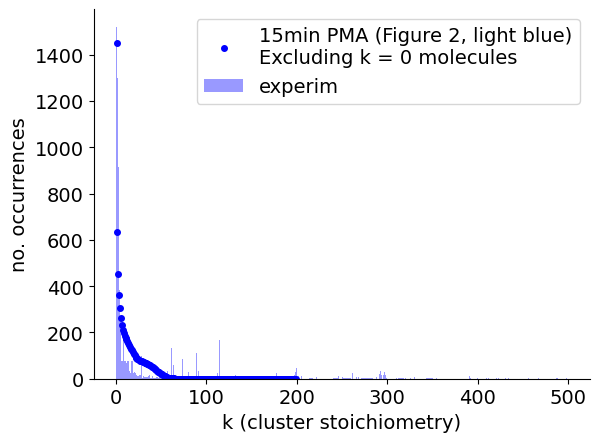

In [44]:
# Second data set over entire range of stoichiometry:
fig2, ax2= plt.subplots(1, 1)
# Plot only first 30 points:
npoints = 200 
ax2.plot(k_list_bis[0:npoints], total_occur_2*theor_poisson_bis_2[0:npoints], 'bo', ms=4, label='15min PMA (Figure 2, light blue)\nExcluding k = 0 molecules')
#ax2.vlines(k_list_bis, 0, total_occur_2*theor_poisson_bis_2, colors='b', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax2.bar(unique_2, counts_2, width=1, alpha=0.4, color='blue', label="experim")
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax2.legend(loc="best")
ax2.spines['top'].set_visible(False)     # remove top part of frame
ax2.spines['right'].set_visible(False)   # remove right part of frame

### Plotting difference between measured and theoretical (measured - theoretical) as occurrences:

In [45]:
# Define quick labels for plots:
label_1 = 'untreated'
label_2 = 'PMA 15min'
label_3 = 'HIV 1min'

Length of differences arrays is: [20, 190, 20]
Length of array k_list_bis is: 199


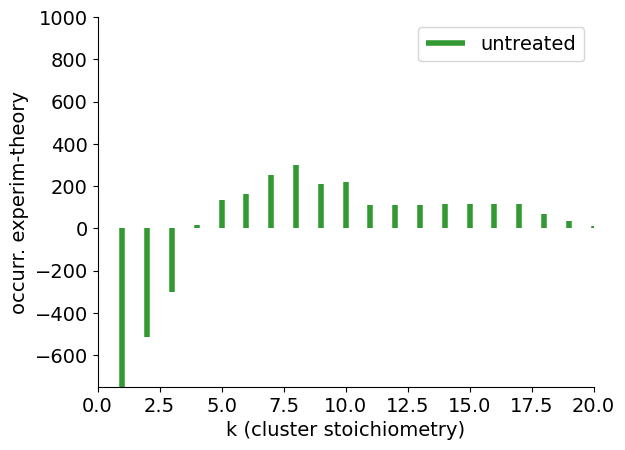

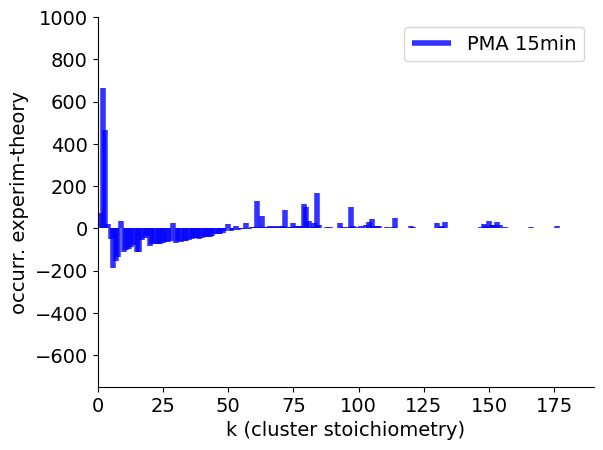

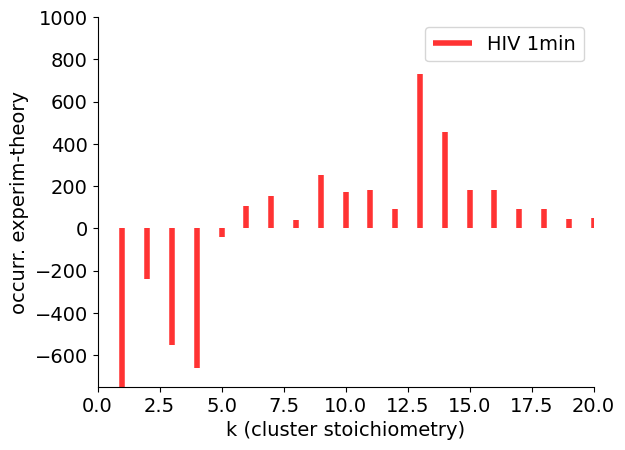

In [46]:
# Measured occurrences minus theoretical occurrences:
# arrays are of different lengths, take smallest:
length_1 = np.min((len(counts_1),len(theor_poisson_bis_1)))
diff_1 = counts_1[0:length_1] - total_occur_1*theor_poisson_bis_1[0:length_1]

length_2 = np.min((len(counts_2),len(theor_poisson_bis_2)))
diff_2 = counts_2[0:length_2] - total_occur_2*theor_poisson_bis_2[0:length_2]

length_3 = np.min((len(counts_3),len(theor_poisson_bis_3)))
diff_3 = counts_3[0:length_3] - total_occur_3*theor_poisson_bis_3[0:length_3]

print("Length of differences arrays is:",[len(diff_1),len(diff_2),len(diff_3)])
print("Length of array k_list_bis is:", len(k_list_bis))

# PLOTS:
# Plot only same no. of points as in data:
npoints = len(diff_1) 
fig1, ax1 = plt.subplots(1, 1)
ax1.vlines(k_list_bis[0:npoints], 0, diff_1[0:npoints], colors='g', lw=4, alpha=0.8, label=label_1)  
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="occurr. experim-theory")
ax1.legend(loc="upper right")
ax1.spines['top'].set_visible(False)     # remove top part of frame
ax1.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax1.set_xlim([0,npoints])
ax1.set_ylim([-750,1000]);

npoints = len(diff_2) 
fig2, ax2 = plt.subplots(1, 1)
ax2.vlines(k_list_bis[0:npoints], 0, diff_2[0:npoints], colors='b', lw=4, alpha=0.8, label=label_2)  
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="occurr. experim-theory")
ax2.legend(loc="upper right")
ax2.spines['top'].set_visible(False)     # remove top part of frame
ax2.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax2.set_xlim([0,npoints])
ax2.set_ylim([-750,1000]);

npoints = len(diff_3) 
fig3, ax3= plt.subplots(1, 1)
ax3.vlines(k_list_bis[0:npoints], 0, diff_3[0:npoints], colors='r', lw=4, alpha=0.8, label=label_3)  
ax3.set(xlabel="k (cluster stoichiometry)", ylabel="occurr. experim-theory")
ax3.legend(loc="upper right")
ax3.spines['top'].set_visible(False)     # remove top part of frame
ax3.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax3.set_xlim([0,npoints])
ax3.set_ylim([-750,1000]);

Plot untreated and HIV data sets together:

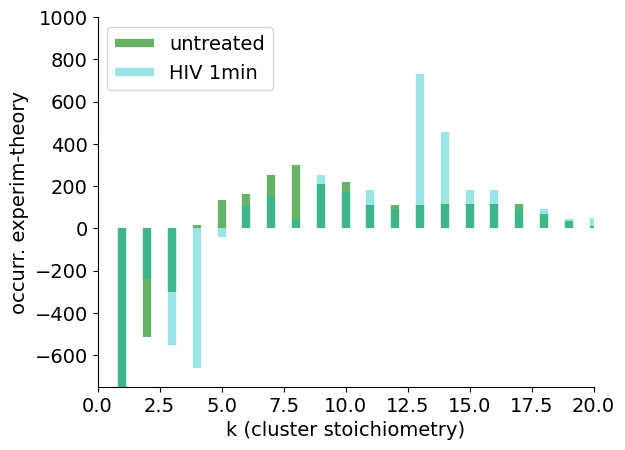

In [47]:
# Plot only same no. of points as in data:
npoints = len(diff_1) 
fig1, ax1 = plt.subplots(1, 1)
ax1.vlines(k_list_bis[0:npoints], 0, diff_1[0:npoints], colors='g', lw=6, alpha=0.6, label=label_1)  

npoints = len(diff_3) 
ax1.vlines(k_list_bis[0:npoints], 0, diff_3[0:npoints], colors='c', lw=6, alpha=0.4, label=label_3)  

ax1.set(xlabel="k (cluster stoichiometry)", ylabel="occurr. experim-theory")
ax1.legend(loc="upper left")
ax1.spines['top'].set_visible(False)     # remove top part of frame
ax1.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax1.set_xlim([0,npoints])
ax1.set_ylim([-750,1000]);

### Plot the entire experimental ranges: histograms of stoichiometries, cluster areas, cluster receptor densities (prob and occurences):

In [48]:
# Measured cluster stoichoimetry is n_1, n_2, n_3

# Measured cluster area in (um^2):
area_1 = data_1[area]
area_2 = data_2[area]
area_3 = data_3[area] 

# Measured receptor number density density (num. molecs/um^2):
density_1 = data_1[density]
density_2 = data_2[density]
density_3 = data_3[density]

The second data set has some large cluster sizes:

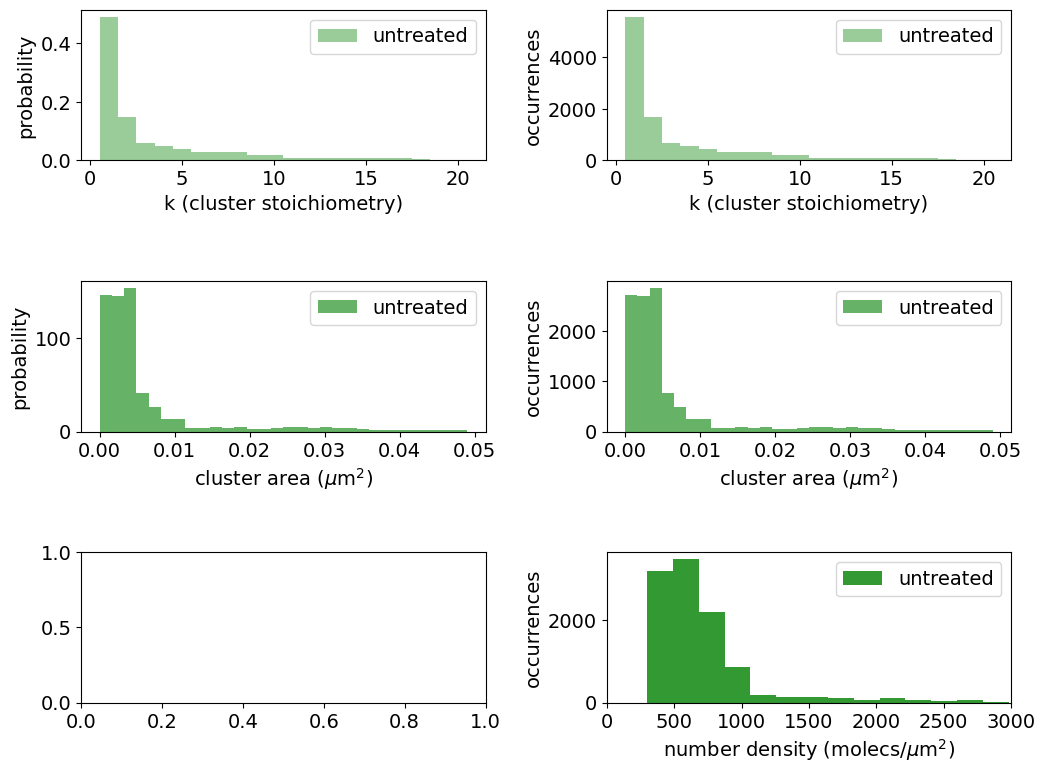

In [51]:
# Plotting 2 subplots:
fig, (((ax1, ax2),(ax3, ax4),(ax5,ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))  # unpacking to assign subplots to different variables

ax1.bar(unique_1, experim_Poisson_1, width=1, alpha=0.4, color='green', label=label_1)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax1.legend(loc="best")

ax3.hist(area_1, density=True, bins=30, alpha=0.6, color='green', label=label_1)  # probabilities
ax3.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="probability")
ax3.legend(loc="best")

ax2.bar(unique_1, counts_1, width=1, alpha=0.4, color='green', label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="occurrences")
ax2.legend(loc="best")

ax4.hist(area_1, density=False, bins=30, alpha=0.6, color='green', label=label_1)  # occurrences
ax4.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="occurrences")
ax4.legend(loc="best")

ax6.hist(density_1, density=False, bins=6000, alpha=0.8, color='green', label=label_1)  # occurrences
ax6.set(xlabel=r"number density (molecs/$\mu$m$^2$)", ylabel="occurrences")
ax6.set_xlim([0,3000]);
#ax6.set_ylim([0,120]);
ax6.legend(loc="best")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

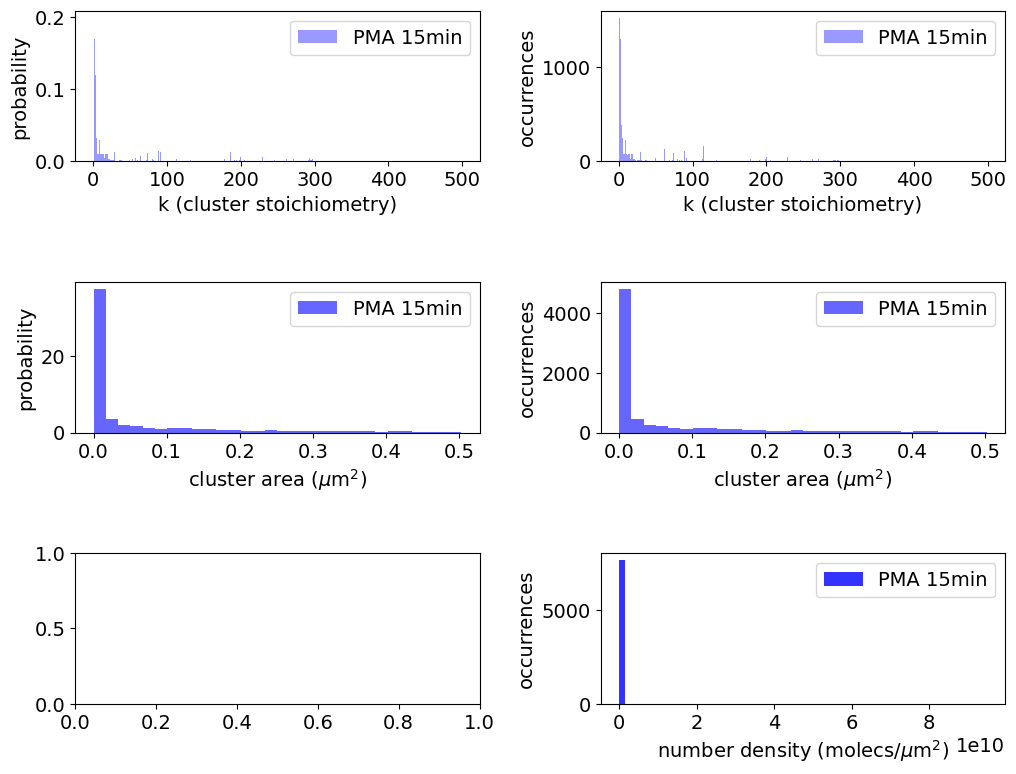

In [52]:
# Plotting 2 subplots:
fig, (((ax1, ax2),(ax3, ax4),(ax5,ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))  # unpacking to assign subplots to different variables

ax1.bar(unique_2, experim_Poisson_2, width=1, alpha=0.4, color='blue', label=label_2)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax1.legend(loc="best")

ax3.hist(area_2, density=True, bins=30, alpha=0.6, color='blue', label=label_2)  # probabilities
ax3.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="probability")
ax3.legend(loc="best")

ax2.bar(unique_2, counts_2, width=1, alpha=0.4, color='blue', label=label_2)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="occurrences")
ax2.legend(loc="best")

ax4.hist(area_2, density=False, bins=30, alpha=0.6, color='blue', label=label_2)  # occurrences
ax4.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="occurrences")
ax4.legend(loc="best")

ax6.hist(density_2, density=False, bins=60, alpha=0.8, color='blue', label=label_2)  # occurrences
ax6.set(xlabel=r"number density (molecs/$\mu$m$^2$)", ylabel="occurrences")
#ax6.set_xlim([0,3000]);
#ax6.set_ylim([0,120]);
ax6.legend(loc="best")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

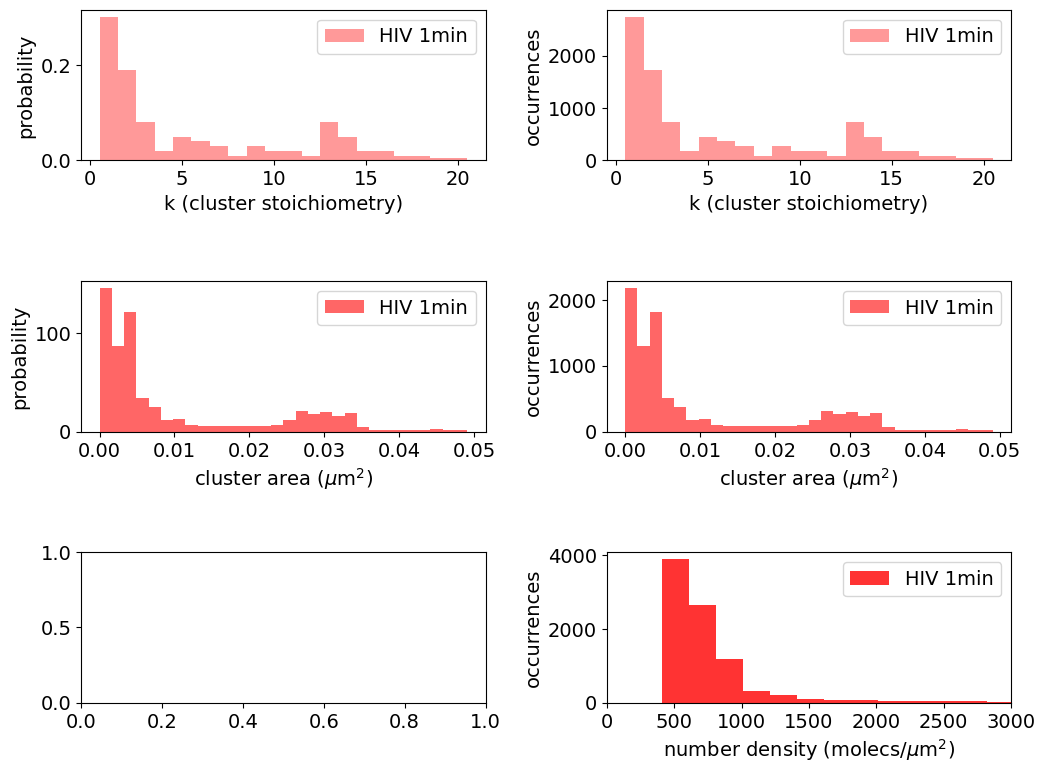

In [53]:
# Plotting 2 subplots:
fig, (((ax1, ax2),(ax3, ax4),(ax5,ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))  # unpacking to assign subplots to different variables

ax1.bar(unique_3, experim_Poisson_3, width=1, alpha=0.4, color='red', label=label_3)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax1.legend(loc="best")

ax3.hist(area_3, density=True, bins=30, alpha=0.6, color='red', label=label_3)  # probabilities
ax3.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="probability")
ax3.legend(loc="best")

ax2.bar(unique_3, counts_3, width=1, alpha=0.4, color='red', label=label_3)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="occurrences")
ax2.legend(loc="best")

ax4.hist(area_3, density=False, bins=30, alpha=0.6, color='red', label=label_3)  # occurrences
ax4.set(xlabel=r"cluster area ($\mu$m$^2$)", ylabel="occurrences")
ax4.legend(loc="best")

ax6.hist(density_3, density=False, bins=6000, alpha=0.8, color='red', label=label_3)  # occurrences
ax6.set(xlabel=r"number density (molecs/$\mu$m$^2$)", ylabel="occurrences")
ax6.set_xlim([0,3000]);
#ax6.set_ylim([0,120]);
ax6.legend(loc="best")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

### Cluster density versus stoichiometry:

In [51]:
#data_1

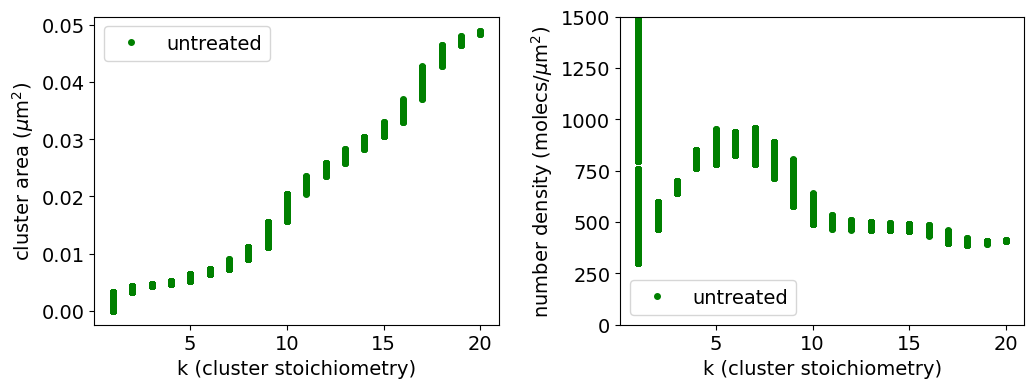

In [54]:
# Plotting 2 subplots:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # unpacking to assign subplots to different variables

ax1.plot(n_1, area_1, 'go', ms=4, label=label_1)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax1.legend(loc="best")

ax2.plot(n_1, density_1, 'go', ms=4, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax2.legend(loc="best")
ax2.set_ylim([0,1500])

plt.subplots_adjust(wspace=0.3)
plt.show()

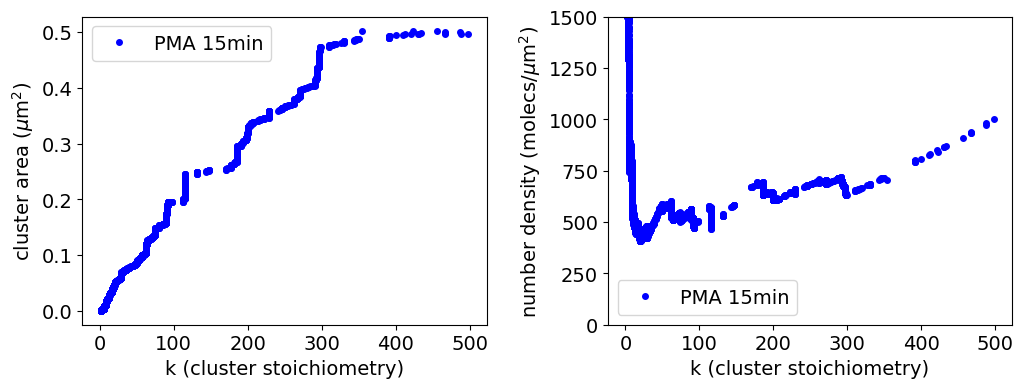

In [55]:
# Plotting 2 subplots:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # unpacking to assign subplots to different variables

ax1.plot(n_2, area_2, 'bo', ms=4, label=label_2)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax1.legend(loc="best")

ax2.plot(n_2, density_2, 'bo', ms=4, label=label_2)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax2.legend(loc="best")
ax2.set_ylim([0,1500])

plt.subplots_adjust(wspace=0.3)
plt.show()

(0.0, 20.0)

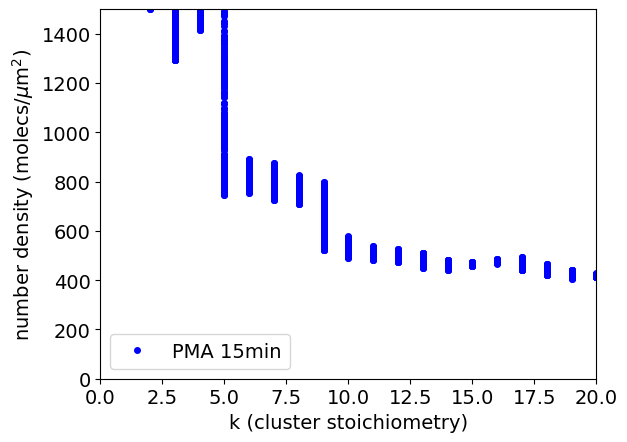

In [56]:
# Limiting range of stoichiometry between 0 and 20 for comparison to other plots:
plt.plot(n_2, density_2, 'bo', ms=4, label=label_2)
plt.xlabel("k (cluster stoichiometry)")
plt.ylabel(r"number density (molecs/$\mu$m$^2$)")
plt.legend(loc="best")
plt.ylim([0,1500])
plt.xlim([0,20])

In [55]:
# Diameter in microns (~0.8um) corresponding to saturating cluster area of 0.5 um^2:
2*np.sqrt(0.5/np.pi)

0.7978845608028654

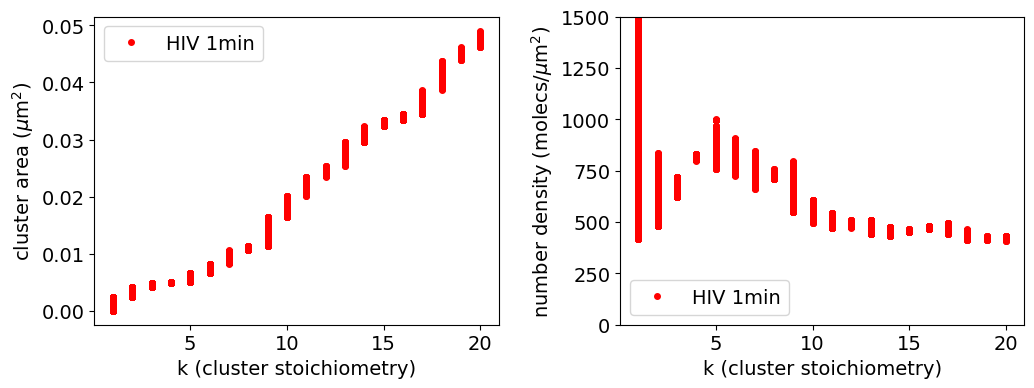

In [57]:
# Plotting 2 subplots:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # unpacking to assign subplots to different variables

ax1.plot(n_3, area_3, 'ro', ms=4, label=label_3)
ax1.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax1.legend(loc="best")

ax2.plot(n_3, density_3, 'ro', ms=4, label=label_3)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax2.legend(loc="best")
ax2.set_ylim([0,1500])

plt.subplots_adjust(wspace=0.3)
plt.show()

### Plotting cluster area and number density for all three data sets on same plot:

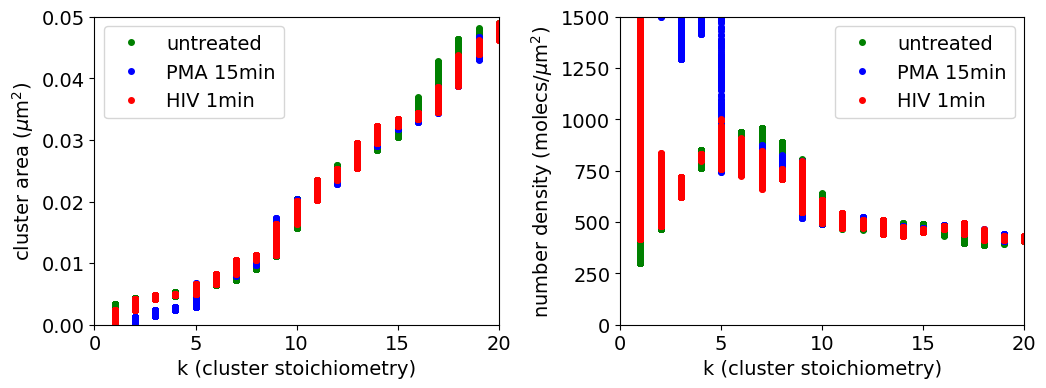

In [58]:
# Plotting 2 subplots:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # unpacking to assign subplots to different variables

ax1.plot(n_1, area_1, 'go', ms=4, label="untreated")
ax1.plot(n_2, area_2, 'bo', ms=4, label="PMA 15min")
ax1.plot(n_3, area_3, 'ro', ms=4, label="HIV 1min")
ax1.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax1.legend(loc="best")
ax1.set_xlim([0,20])
ax1.set_ylim([0,0.05])

ax2.plot(n_1, density_1, 'go', ms=4, label="untreated")
ax2.plot(n_2, density_2, 'bo', ms=4, label="PMA 15min")
ax2.plot(n_3, density_3, 'ro', ms=4, label="HIV 1min")
ax2.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax2.legend(loc="best")
ax2.set_xlim([0,20])
ax2.set_ylim([0,1500])

plt.subplots_adjust(wspace=0.3)
plt.show()

Plotting over the entire data range (because the PMA data set has higher stoichiometries):

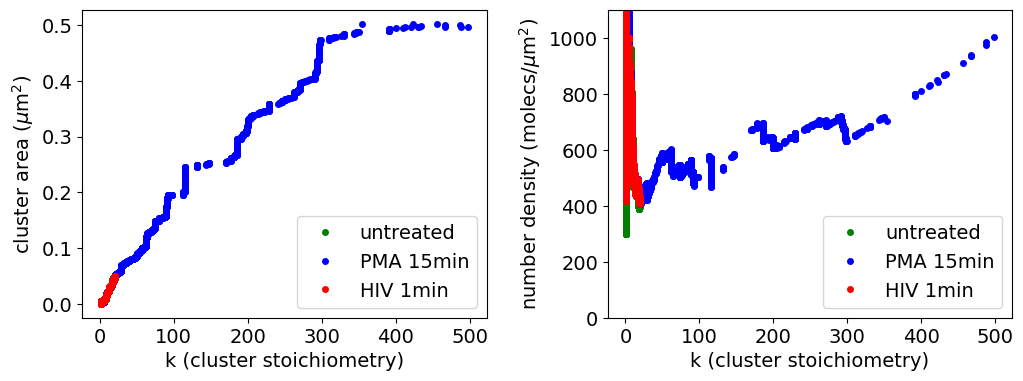

In [59]:
# Plotting 2 subplots:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # unpacking to assign subplots to different variables

ax1.plot(n_1, area_1, 'go', ms=4, label="untreated")
ax1.plot(n_2, area_2, 'bo', ms=4, label="PMA 15min")
ax1.plot(n_3, area_3, 'ro', ms=4, label="HIV 1min")
ax1.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax1.legend(loc="best")
#ax1.set_xlim([0,20])
#ax1.set_ylim([0,0.05])

ax2.plot(n_1, density_1, 'go', ms=4, label="untreated")
ax2.plot(n_2, density_2, 'bo', ms=4, label="PMA 15min")
ax2.plot(n_3, density_3, 'ro', ms=4, label="HIV 1min")
ax2.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax2.legend(loc="best")
#ax2.set_xlim([0,20])
ax2.set_ylim([0,1100])

plt.subplots_adjust(wspace=0.3)
plt.show()

The clusters with only 1 molecule (k=1 below) have a wide range of densities, including very large ones (some have very low areas) and generate a massive density peak at k=1: 

(0.0, 1000.0)

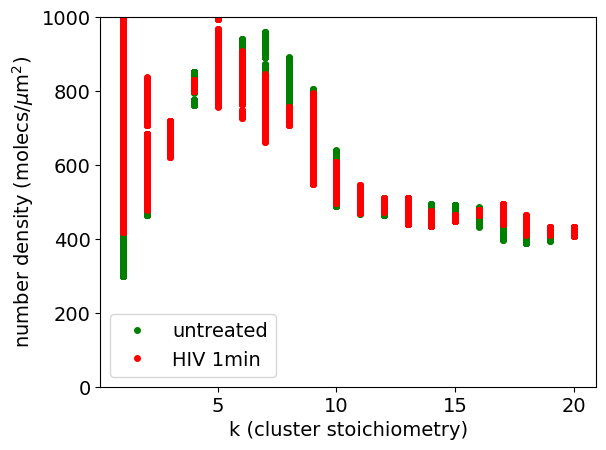

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(n_1, density_1, 'go', ms=4, label="untreated")
ax.plot(n_3, density_3, 'ro', ms=4, label="HIV 1min")
ax.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax.legend(loc="best");
#ax.set_xlim([0,20])
ax.set_ylim([0,1000])

### CD4 packing in clusters, considering cluster density and CD4 size

The measured **receptor number densities** in most clusters are in the range $\sim 500-900 ~\mathrm{molecs}/\mu \mathrm{m}^2$ for stoichiometries $\sim 2-20$ molecules.

This corresponds to an area per CD4 molecule in the cluster of $\sim 0.001-0.002 ~\mu \mathrm{m}^2$:

In [63]:
densi_range = np.array([500., 900.])  # density in molecs/um^2
1/densi_range    # area in um^2 per CD4 molecule

array([0.002     , 0.00111111])

and to an **inter-particle distance** (twice radius of circle corresponding to the area per molecule) of $\sim 0.04-0.05 ~\mu \mathrm{m}$ (40-50 nm) on average:

In [64]:
2*np.sqrt(1/(densi_range*np.pi))    # inter-particle distance in microns

array([0.05046265, 0.03761264])

Considering a lateral diameter of approx. ~3 nm for one CD4 molecule, the area of a single CD4 (considered circular) is $\sim 7 \times 10^{-6} ~\mu \mathrm{m}^2$:

In [65]:
area_CD4 = np.pi*(3*1e-3/2)**2    # area in um^2
max_fill_fraction = 0.9069
print(area_CD4)

7.068583470577034e-06


The tightest possible packing for circles in hexagonal packing, in which the **fill fraction** (area of circles divided by total area) is $\sim 0.9069$ (https://en.wikipedia.org/wiki/Circle_packing). In other words, the total area of the packing is larger by 1/0.9069 compared to the area of a single circle.

Therefore, for the tightest packing, e.g. dimers, multimers or tight clusters, (considering circles) we would expect a maximum number density $\sim 1\times 10^5 ~\mathrm{molecs}/\mu \mathrm{m}^2$, so two orders of magnitude larger than the cluster densities we observe:

In [66]:
(area_CD4/max_fill_fraction)**(-1)   # max CD4 packing density in molecules/um^2  

128300.10479114659

### Calculate likelihood of counting the number of molecules we count on each cluster:

On a per-cluster basis, the theoretical probability (likelihood) of counting in a cluster a number of receptors equal to the measured stoichiometry number, knowing the cluster area is:

$$P(k_i; \lambda_i) = P(k_i; \pi r_i^2 n) \,,$$

where $r_i$ is the measured cluster radius and $k_i$ is the measured stoichiometry.

The function below calculates the corresponding list of theoretical likelihoods if we had a random distribution of receptors in the cell with overall number density $n$:

In [67]:
def likelihood_theor(cluster_diameter, measured_counts, density):                     
    '''Function to calculate list of expected probabilities of counting in each cluster, given its diameter, 
    a number of molecules equal to the measured stoichiometry.
    Inputs: cluster_diameter: measured diameter/s of receptor cluster/s in microns (array); 
    measured_counts: measured number of receptors in each cluster (array);
    density: overall density of receptors in whole cell (molecules/um^2) (single number);
    Output: likelih: expected likelihoods (array, one per cluster size).'''
    
    # Calculate cluster area (assume 2D circular areas) in um^2 where receptors are counted:
    area = np.pi*(cluster_diameter/2)**2    # list of cluster areas
    
    # Calculate mean numbers of receptors counted in receptor areas (lambda parameter for Poisson distrib):
    mean_num = density*area  # list
    
    # Calculate probability from corresponding Poisson distribution:
    likelih = poisson.pmf(measured_counts, mean_num)  
    
    return likelih  # theoretical likelihood for each cluster

In [68]:
likelih_1 = likelihood_theor(cluster_diam_1, n_1, n)   # untreated data set
likelih_2 = likelihood_theor(cluster_diam_2, n_2, n)   # PMA data set
likelih_3 = likelihood_theor(cluster_diam_3, n_3, n)   # HIV data set

Plots of histograms of likelihoods and likelihood versus stoichiometry:

Note that, below, **likelihoods are not re-normalised to exclude the k=0 probability!**

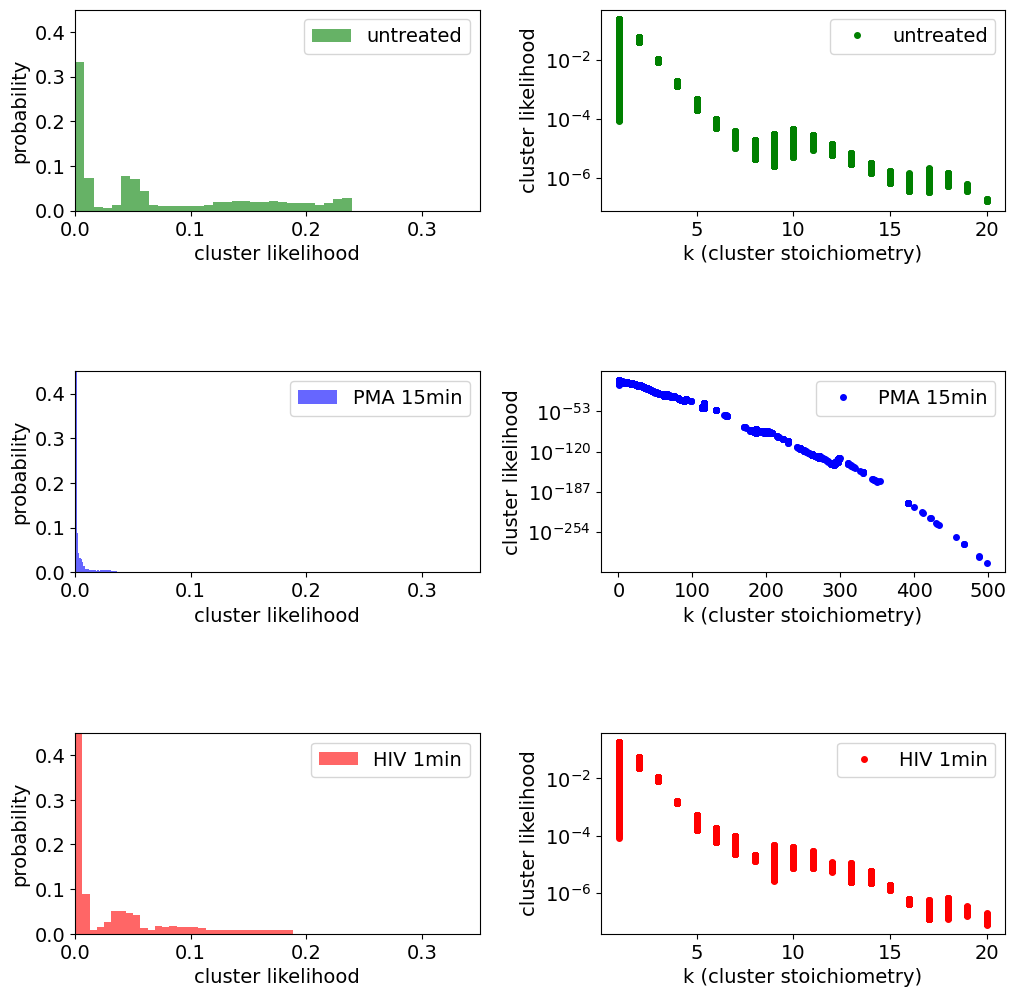

In [69]:
fig, (((ax1, ax2), (ax3, ax4), (ax5, ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))   # 4 subplots

# Untreated data set, histogram of likelihoods (plotting histogram probabilities):
weights_1 = np.ones_like(likelih_1) / len(likelih_1)   # array of ones of same shape, divided by no. of points
ax1.hist(likelih_1, bins=30, weights=weights_1, alpha=0.6, color='green', label=label_1)  # occurrences
ax1.set(xlabel="cluster likelihood", ylabel="probability")
ax1.set_xlim([0,0.35]) # all data sets in same scale
ax1.set_ylim([0,0.45]) # all data sets in same scale
ax1.legend(loc="best")

# PMA data set, histogram of likelihoods:
weights_2 = np.ones_like(likelih_2) / len(likelih_2)   # array of ones of same shape, divided by no. of points
ax3.hist(likelih_2, bins=30, weights=weights_2, alpha=0.6, color='blue', label=label_2)  # occurrences
ax3.set(xlabel="cluster likelihood", ylabel="probability")
ax3.set_xlim([0,0.35]) # all data sets in same scale
ax3.set_ylim([0,0.45]) # all data sets in same scale
ax3.legend(loc="best")

# HIV data set, histogram of likelihoods:
weights_3 = np.ones_like(likelih_3) / len(likelih_3)   # array of ones of same shape, divided by no. of points
ax5.hist(likelih_3, bins=30, weights=weights_3, alpha=0.6, color='red', label=label_3)  # occurrences
ax5.set(xlabel="cluster likelihood", ylabel="probability")
ax5.set_xlim([0,0.35]) # all data sets in same scale
ax5.set_ylim([0,0.45]) # all data sets in same scale
ax5.legend(loc="best")

# Untreated data set, likelihood versus stoichiometry:
ax2.semilogy(n_1, likelih_1, 'go', ms=4, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="cluster likelihood")
ax2.legend(loc="best")
#ax2.set_xlim([0,0.35]) # all data sets in same scale
#ax2.set_ylim([0.0001,1])

# PMA data set, likelihood versus stoichiometry:
ax4.semilogy(n_2, likelih_2, 'bo', ms=4, label=label_2)
ax4.set(xlabel="k (cluster stoichiometry)", ylabel="cluster likelihood")
ax4.legend(loc="best")
#ax4.set_xlim([0,0.35])  # all data sets in same scale
#ax4.set_ylim([0,0.05])

# HIV data set, likelihood versus stoichiometry:
ax6.semilogy(n_3, likelih_3, 'ro', ms=4, label=label_3)
ax6.set(xlabel="k (cluster stoichiometry)", ylabel="cluster likelihood")
ax6.legend(loc="best")
#ax6.set_xlim([0,0.35])  # all data sets in same scale
#ax6.set_ylim([0.0001,1])

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

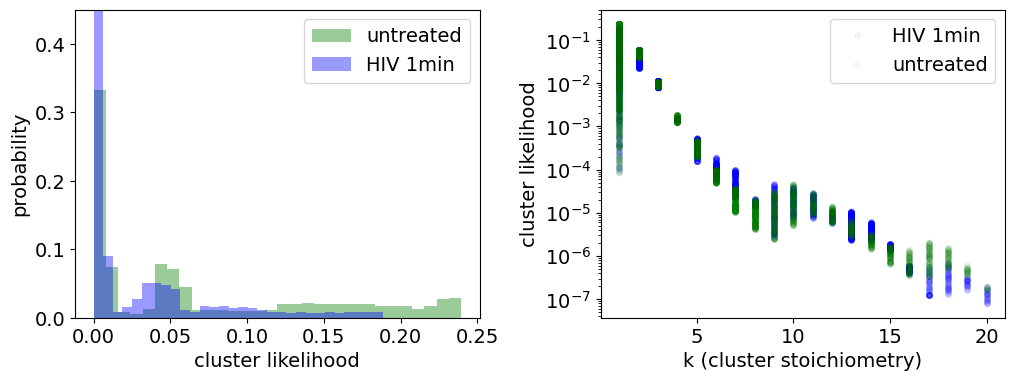

In [70]:
fig, (((ax1, ax2))) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))   # 4 subplots

# Histograms of likelihoods (including k=0, plotting histogram probabilities), 
# likelihood of counting the stoichiometry we measured in each cluster:
# untreated and HIV data sets:
ax1.hist(likelih_1, bins=30, weights=weights_1, alpha=0.4, color='green', label=label_1)  # occurrences
ax1.hist(likelih_3, bins=30, weights=weights_3, alpha=0.4, color='blue', label=label_3)  # occurrences
ax1.set(xlabel="cluster likelihood", ylabel="probability")
#ax1.set_xlim([0,0.35]) # all data sets in same scale
ax1.set_ylim([0,0.45]) # all data sets in same scale
ax1.legend(loc="best")

# Re-normalised likelihood versus stoichiometry, untreated and HIV data sets:
ax2.semilogy(n_3, likelih_3, 'bo', ms=4, alpha=0.04, label=label_3)
ax2.semilogy(n_1, likelih_1, 'go', ms=4, alpha=0.04, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="cluster likelihood")
ax2.legend(loc="best")
#ax2.set_xlim([0,0.35]) # all data sets in same scale
#ax2.set_ylim([0.0001,1])

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

**Re-normalising likelihoods:**

We need to divide each probability by the sum of all probabilities excluding $k=0$. To calculate the sum of all probabilities, we use as before k_list (from 0 to 200), we calculate the theoretical probability distribution for all k's in k_list for the corresponding lambda value, and we then divide by the sum of all probabilities excluding k=0, so we divide by $\sum_{k = 1}^{200} P(k, \lambda)$. k=200 here works as k=infinity essentially.




In [71]:
def likelihood_theor_renorm(cluster_diameter, measured_counts, density):                     
    '''Function to calculate list of expected probabilities of counting in each cluster, given its diameter, 
    a number of molecules equal to the measured stoichiometry. The probability distribution for each cluster 
    size is re-normalised to exclude k = 0.
    Inputs: cluster_diameter: measured diameter/s of receptor cluster/s in microns (array); 
    measured_counts: measured number of receptors in each cluster (array);
    density: overall density of receptors in whole cell (molecules/um^2) (single number);
    Output: likelih: expected likelihoods (array, one per cluster size).'''
    
    # Calculate cluster area (assume 2D circular areas) in um^2 where receptors are counted:
    area = np.pi*(cluster_diameter/2)**2    # list of cluster areas
    
    # Calculate mean numbers of receptors counted in receptor areas (lambda parameter for Poisson distrib):
    mean_num = density*area  # list
       
    # Re-normalise Poisson prob distrib for each cluster:
    k_list = np.arange(0,200)  # predicted number of molecules per cluster, horiz axis of Poisson distrib.    
    # Theoretical Poisson prob distributions for all k_list values
    
    likelih = np.empty(len(cluster_diameter))   # initialise empty array to accummulate cluster likelihoods 
    for i in range(len(cluster_diameter)):      # loop through clusters
        likelih_0 = poisson.pmf(measured_counts[i], mean_num[i])  # likelihood for the measured k value
        # Calculate theoretical Poisson distribution from k=0 to k=200 (~infinity) for a given cluster:
        theor_distrib = poisson.pmf(k_list, mean_num[i])      
        renormalisation_factor = np.sum(theor_distrib[1:]) # re-normalise to exclude k=0 values  
        likelih[i] = likelih_0 / renormalisation_factor    # re-normalised likelihood, store value
    
    return likelih  # theoretical likelihood for each cluster

In [72]:
# Calculate re-normalised likelihoods (excluding k=0):
# Takes a few seconds to calculate.
likelih_renorm_1 = likelihood_theor_renorm(cluster_diam_1, n_1, n)   # untreated data set
likelih_renorm_2 = likelihood_theor_renorm(cluster_diam_2, n_2, n)   # PMA data set
likelih_renorm_3 = likelihood_theor_renorm(cluster_diam_3, n_3, n)   # HIV data set

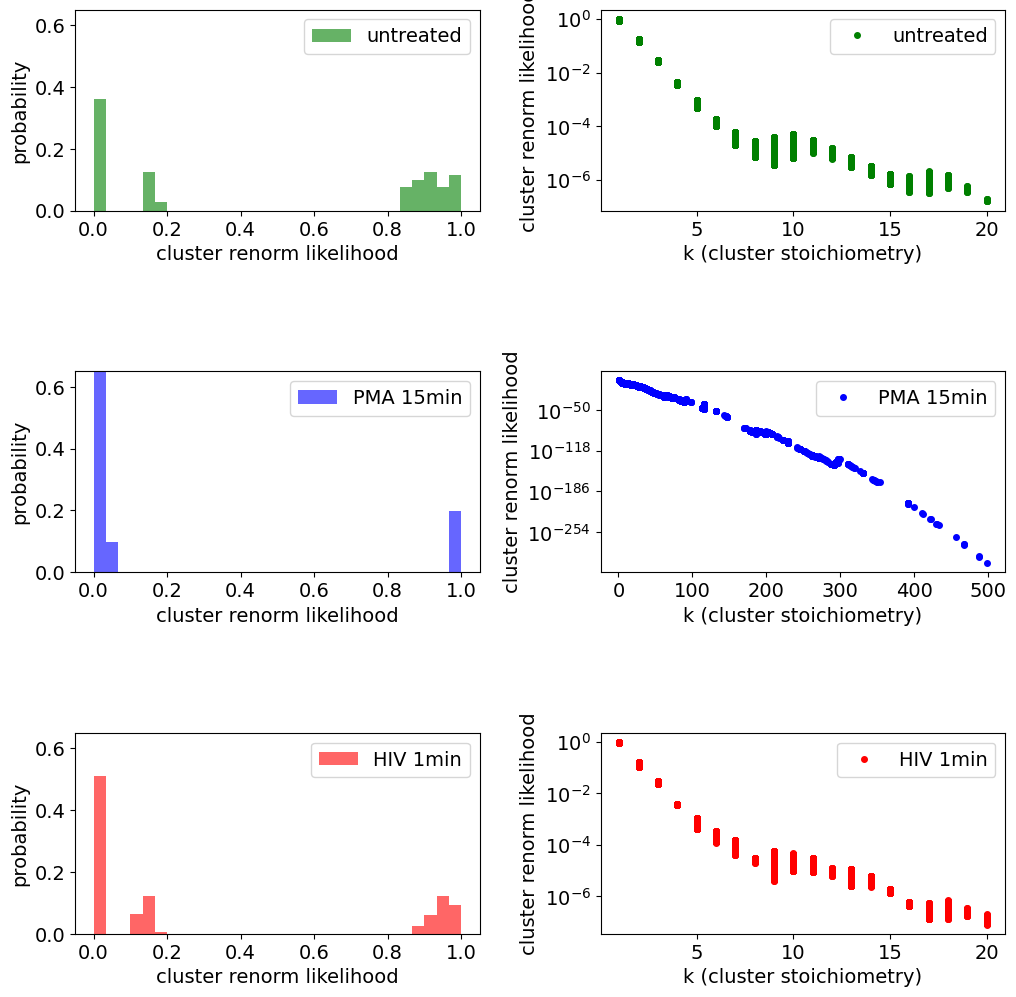

In [73]:
fig, (((ax1, ax2), (ax3, ax4), (ax5, ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))   # 4 subplots

# Untreated data set, histogram of re-normalised likelihoods (plotting histogram probabilities):
weights_1 = np.ones_like(likelih_renorm_1) / len(likelih_renorm_1)   # array of ones of same shape, divided by no. of points
ax1.hist(likelih_renorm_1, bins=30, weights=weights_1, alpha=0.6, color='green', label=label_1)  # occurrences
ax1.set(xlabel="cluster renorm likelihood", ylabel="probability")
#ax1.set_xlim([0,0.35]) # all data sets in same scale
ax1.set_ylim([0,0.65]) # all data sets in same scale
ax1.legend(loc="best")

# PMA data set, histogram of re-normalised likelihoods:
weights_2 = np.ones_like(likelih_renorm_2) / len(likelih_renorm_2)   # array of ones of same shape, divided by no. of points
ax3.hist(likelih_renorm_2, bins=30, weights=weights_2, alpha=0.6, color='blue', label=label_2)  # occurrences
ax3.set(xlabel="cluster renorm likelihood", ylabel="probability")
#ax3.set_xlim([0,0.35]) # all data sets in same scale
ax3.set_ylim([0,0.65]) # all data sets in same scale
ax3.legend(loc="best")

# HIV data set, histogram of re-normalisedlikelihoods:
weights_3 = np.ones_like(likelih_renorm_3) / len(likelih_renorm_3)   # array of ones of same shape, divided by no. of points
ax5.hist(likelih_renorm_3, bins=30, weights=weights_3, alpha=0.6, color='red', label=label_3)  # occurrences
ax5.set(xlabel="cluster renorm likelihood", ylabel="probability")
#ax5.set_xlim([0,0.35]) # all data sets in same scale
ax5.set_ylim([0,0.65]) # all data sets in same scale
ax5.legend(loc="best")

# Untreated data set, re-normalised likelihood versus stoichiometry:
ax2.semilogy(n_1, likelih_renorm_1, 'go', ms=4, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="cluster renorm likelihood")
#ax2.set_xlim([0,0.35]) # all data sets in same scale
#ax2.set_ylim([0.0001,1.5])
ax2.legend(loc="best")

# PMA data set, re-normalised likelihood versus stoichiometry:
ax4.semilogy(n_2, likelih_renorm_2, 'bo', ms=4, label=label_2)
ax4.set(xlabel="k (cluster stoichiometry)", ylabel="cluster renorm likelihood")
ax4.legend(loc="best")
#ax4.set_xlim([0,0.35])  # all data sets in same scale
#ax4.set_ylim([0,0.05])

# HIV data set, re-normalised likelihood versus stoichiometry:
ax6.semilogy(n_3, likelih_renorm_3, 'ro', ms=4, label=label_3)
ax6.set(xlabel="k (cluster stoichiometry)", ylabel="cluster renorm likelihood")
#ax6.set_xlim([0,0.35])  # all data sets in same scale
#ax6.set_ylim([0.0001,1.5])
ax6.legend(loc="best")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

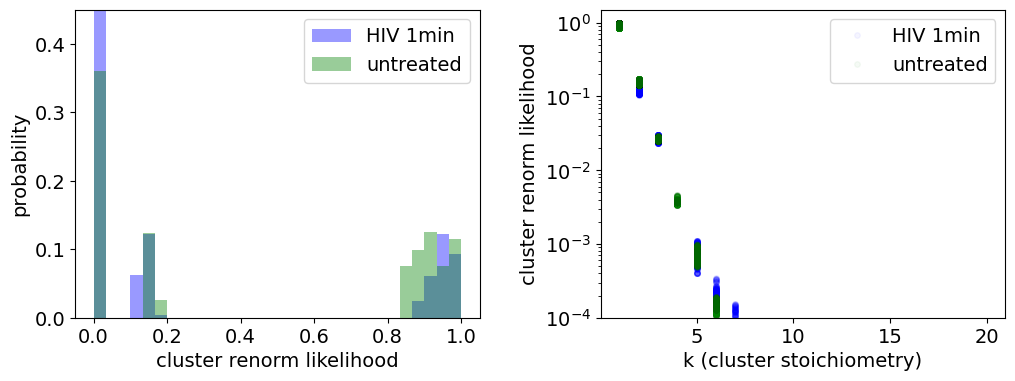

In [74]:
fig, (((ax1, ax2))) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))   # 4 subplots

# Histograms of renormalised likelihoods (excluding k=0, plotting histogram probabilities), 
# so likelihood of counting the stoichiometry we measured in each cluster, when we only look at areas with clusters:
# untreated and HIV data sets:
ax1.hist(likelih_renorm_3, bins=30, weights=weights_3, alpha=0.4, color='blue', label=label_3)  # occurrences
ax1.hist(likelih_renorm_1, bins=30, weights=weights_1, alpha=0.4, color='green', label=label_1)  # occurrences
ax1.set(xlabel="cluster renorm likelihood", ylabel="probability")
#ax1.set_xlim([0,0.35]) # all data sets in same scale
ax1.set_ylim([0,0.45]) # all data sets in same scale
ax1.legend(loc="best")

# Re-normalised likelihood versus stoichiometry, untreated and HIV data sets:
ax2.semilogy(n_3, likelih_renorm_3, 'bo', ms=4, alpha=0.04, label=label_3)
ax2.semilogy(n_1, likelih_renorm_1, 'go', ms=4, alpha=0.04, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="cluster renorm likelihood")
ax2.legend(loc="best")
#ax2.set_xlim([0,0.35]) # all data sets in same scale
ax2.set_ylim([0.0001,1.5])

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

**It seems that we might be able to distinguish clusters with k=1 (monomers), k=2, k=3 molecules, etc. in the histogram of likelihoods** and plot of re-normalised likelihood versus stoichiometry:

The high **likelihoods (>0.6)** in the histogram of re-normalised cluster-likelihoods corresponds entirely to the **monomers (k = 1)**. Clusters with very low lambda (mean stoichiometry in that cluster size estimated from $n$) have very large probabilities. **See below the fraction of monomers we measure out of all measured clusters.**

The **likelihoods around 0.2-0.3** correspond to **clusters with k = 2 molecules**.

The **likelihoods around 0.06-0.1** correspond to **clusters with k = 3 molecules**.

The **likelihoods < 0.05** correspond to **clusters with k > 3 molecules**.

**Therefore the HIV data, compared to the untreated data, shows: less monomers, slightly more clusters with k=2,3 molecules, significantly more clusters with k>3 molecules**. We can write k=1,2,3, etc. on top of the histogram above.

### Fractions of monomers and clusters with k=2, 3, etc we measure:

In [72]:
# The previously calculated k values and no. of occurrences for each data set were:
# unique_1, counts_1   
# unique_2, counts_2 
# unique_3, counts_3    
# The fractions of clusters with a given size were previously calculated as: 
# Convert to normalised probability (excludes k = 0 molecules):
#experim_Poisson_1 = counts_1/np.sum(counts_1)
#experim_Poisson_2 = counts_2/np.sum(counts_2)
#experim_Poisson_3 = counts_3/np.sum(counts_3)

In [75]:
unique_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [76]:
# Percentage of clusters for each stoichiometry, starting at k=1, untreated data:
100*experim_Poisson_1  

array([49.00335156, 15.00264597,  5.99753043,  5.00088199,  4.00423355,
        2.99876521,  2.99876521,  2.99876521,  2.00211678,  2.00211678,
        0.99664844,  0.99664844,  0.99664844,  0.99664844,  0.99664844,
        0.99664844,  0.99664844,  0.59975304,  0.29987652,  0.11465867])

In [77]:
# Percentage of clusters with 13-16 molecules for untreated data:
np.sum(100*experim_Poisson_1[12:16])  

3.986593755512436

In [78]:
# Percentage of clusters with >3 molecules (4 or more) for untreated data:
np.sum(100*experim_Poisson_1[3:])  

29.996472040924324

In [79]:
# Percentage of clusters for each stoichiometry, starting at k=1, HIV data:
100*experim_Poisson_3  

array([30.00109613, 18.99594432,  8.00175381,  1.9949578 ,  4.9983558 ,
        4.0008769 ,  3.00339801,  0.9974789 ,  3.00339801,  1.9949578 ,
        1.9949578 ,  0.9974789 ,  8.00175381,  4.9983558 ,  1.9949578 ,
        1.9949578 ,  0.9974789 ,  0.9974789 ,  0.5042201 ,  0.52614272])

In [80]:
# Percentage of clusters with 13-16 molecules for HIV data
np.sum(100*experim_Poisson_3[12:16])  

16.99002521100515

In [81]:
# Percentage of clusters with >3 molecules (4 or more) for HIV data:
np.sum(100*experim_Poisson_3[3:]) 

43.00120574372465

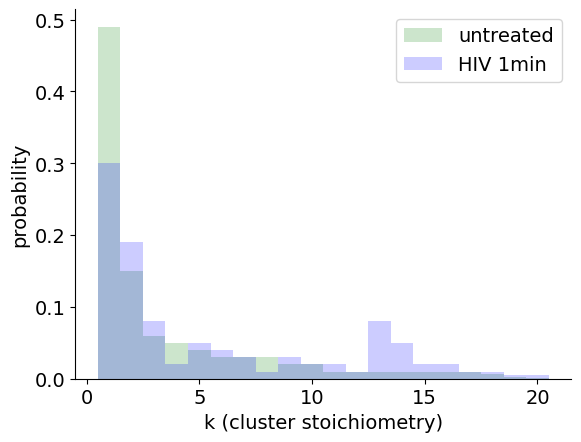

In [82]:
# Plot only first 30 points:
npoints = 30 

fig, ax = plt.subplots(1, 1)
ax.bar(unique_1, experim_Poisson_1, width=1, alpha=0.2, color='green', label=label_1)
ax.bar(unique_3, experim_Poisson_3, width=1, alpha=0.2, color='blue', label=label_3)
ax.set(xlabel="k (cluster stoichiometry)", ylabel="probability")
ax.legend(loc="best")
ax.spines['top'].set_visible(False)     # remove top part of frame
ax.spines['right'].set_visible(False)   # remove right part of frame

For the **untreated data set**, **49%** of measured clusters are **monomers**, 15 % have 2 molecules, 6% have 3 molecules, and 30% have 4 or more molecules.

For the **HIV data set**, only **30%** of measured clusters are **monomers**, 19 % have 2 molecules, 8% have 3 molecules, and 43% have 4 or more molecules. 

The percentage of clusters with 13-16 molecules is ~17% when HIV is present, whereas this is 4% in the untreated cells. So **we measure a ~4-fold increase in the fraction of clusters with 13-16 molecules when HIV is present.**

### Proposed final plots:

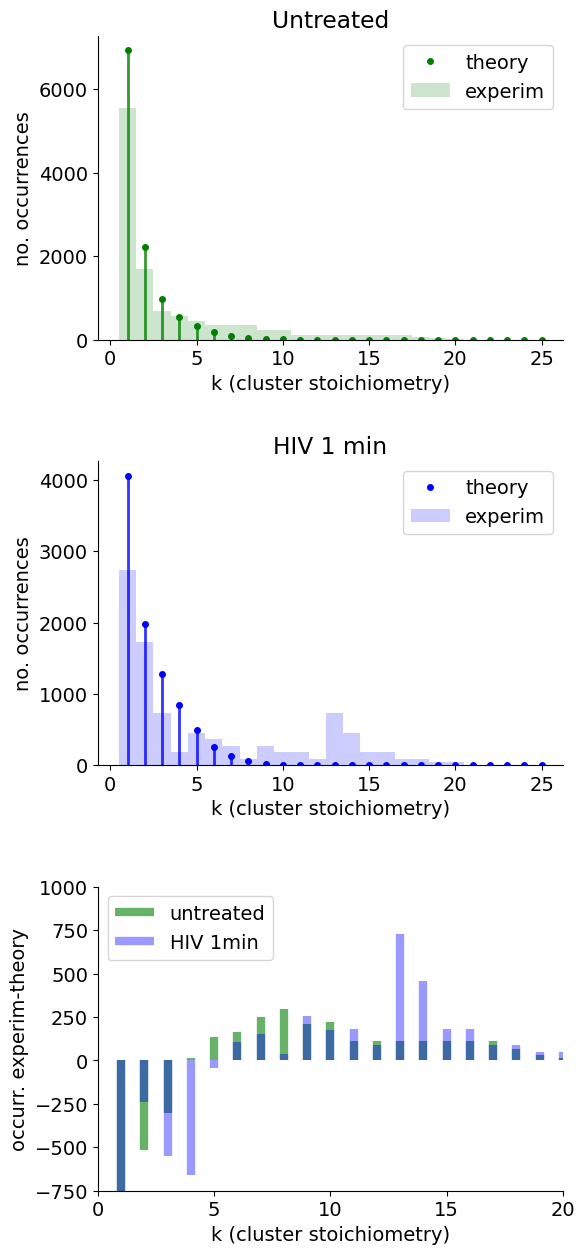

In [83]:
fig, (((ax1, ax2, ax3))) = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))   # 4 subplots

# Plot stoichiometry probability distributions (theoretical and experimental):

# Untreated data set:
# Plot only first 30 points:
npoints = 25 
ax1.plot(k_list_bis[0:npoints], total_occur_1*theor_poisson_bis_1[0:npoints], 'go', ms=4, label="theory")
ax1.vlines(k_list_bis[0:npoints], 0, total_occur_1*theor_poisson_bis_1[0:npoints], colors='g', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax1.bar(unique_1, counts_1, width=1, alpha=0.2, color='green', label="experim")
ax1.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax1.set_title("Untreated")
ax1.legend(loc="best")
ax1.spines['top'].set_visible(False)     # remove top part of frame
ax1.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
#ax1.set_ylim([0,6000]) # plot all on same vertical scale

# HIV data set:
npoints = 25
ax2.plot(k_list_bis[0:npoints], total_occur_3*theor_poisson_bis_3[0:npoints], 'bo', ms=4, label="theory")
ax2.vlines(k_list_bis[0:npoints], 0, total_occur_3*theor_poisson_bis_3[0:npoints], colors='b', lw=2, alpha=0.8)  # add vertical lines between y=0 and y= value of Poisson probability
ax2.bar(unique_3, counts_3, width=1, alpha=0.2, color='blue', label="experim")
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax2.set_title("HIV 1 min")
ax2.legend(loc="best")
ax2.spines['top'].set_visible(False)     # remove top part of frame
ax2.spines['right'].set_visible(False)   # remove right part of frame
#ax2.set_ylim([0,6000]) # plot all on same vertical scale


# Plot difference in occurrences between experiment and theory (untreated and HIV data sets):
npoints = len(diff_1) 
ax3.vlines(k_list_bis[0:npoints], 0, diff_1[0:npoints], colors='g', lw=6, alpha=0.6, label=label_1)  
npoints = len(diff_3) 
ax3.vlines(k_list_bis[0:npoints], 0, diff_3[0:npoints], colors='b', lw=6, alpha=0.4, label=label_3)  
ax3.set(xlabel="k (cluster stoichiometry)", ylabel="occurr. experim-theory")
ax3.legend(loc="upper left")
ax3.spines['top'].set_visible(False)     # remove top part of frame
ax3.spines['right'].set_visible(False)   # remove right part of frameset(xlabel="k (cluster stoichiometry)", ylabel="no. occurrences")
ax3.set_xlim([0,npoints])
ax3.set_ylim([-750,1000]);

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

#fig.savefig('extra_fig_1.eps', format='eps', bbox_inches='tight')   
#fig.savefig('extra_fig_1.png', format='png', bbox_inches='tight') 

I am not sure about the plot of difference of experimental minus theoretical stoichiometry distributions (last plot). I think the distributions might be enough and clearer. 

The plot of cluster area versus stoichiometry could be in the supplementary info (SI). 

The plot below could be shown in the SI to say that in all three data sets there seems to be a somewhat increased packing of receptors in clusters with 3-9 CD4 molecules:

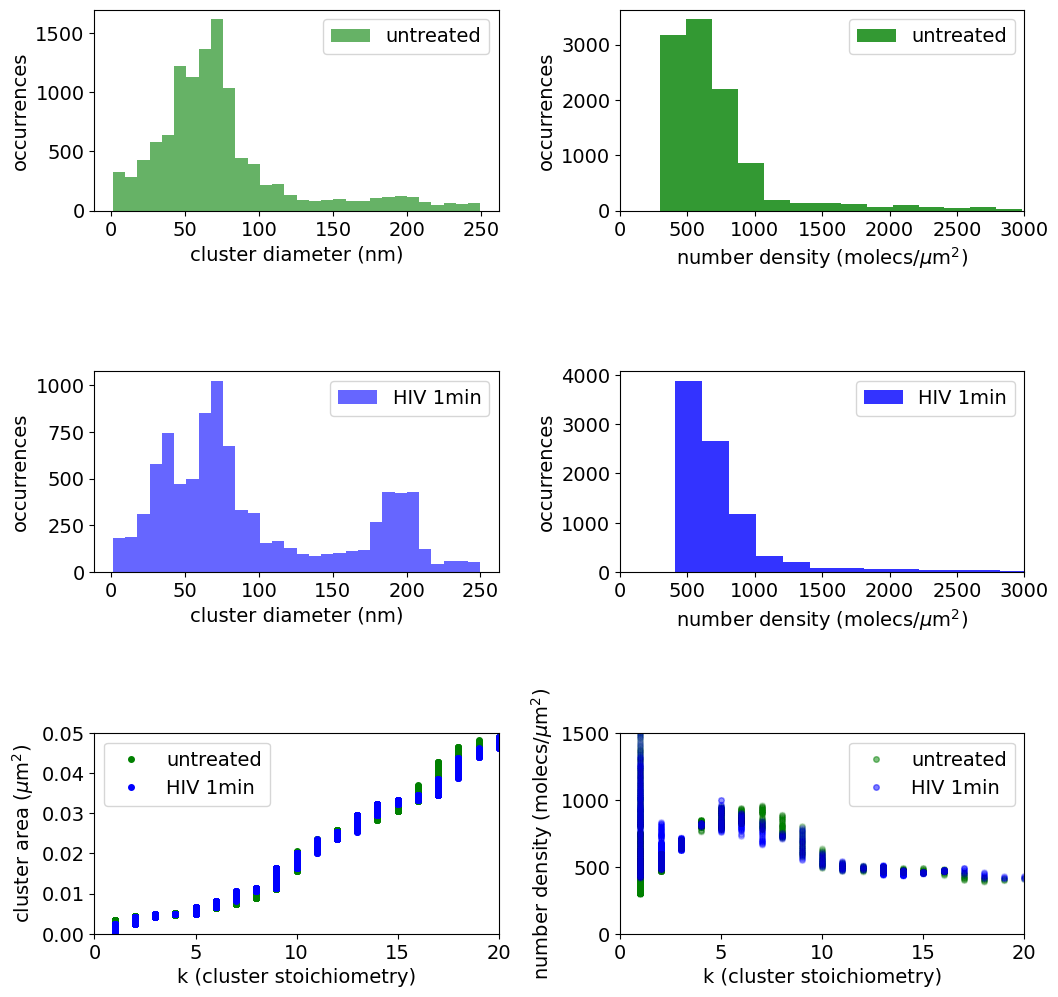

In [84]:
fig, (((ax1, ax2), (ax3, ax4), (ax5, ax6))) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))   # 4 subplots

# Untreated data set, histogram of cluster diameters:
ax1.hist(data_1[diam], density=False, bins=30, alpha=0.6, color='green', label=label_1)  # occurrences
ax1.set(xlabel="cluster diameter (nm)", ylabel="occurrences")
ax1.legend(loc="best")

# HIV data set, histogram of cluster diameters:
ax3.hist(data_3[diam], density=False, bins=30, alpha=0.6, color='blue', label=label_3)  # occurrences
ax3.set(xlabel="cluster diameter (nm)", ylabel="occurrences")
ax3.legend(loc="best")

# Untreated data set, histogram of cluster densities:
# takes a while to calculate so many bins
# Very large densities corresponding to k=1 clusters are excluded
ax2.hist(density_1, density=False, bins=6000, alpha=0.8, color='green', label=label_1)  # occurrences
ax2.set(xlabel=r"number density (molecs/$\mu$m$^2$)", ylabel="occurrences")
ax2.set_xlim([0,3000]);
#ax2.set_ylim([0,120]);
ax2.legend(loc="best")

# HIV data set, histogram of cluster densities:
# takes a while to calculate so many bins
# Very large densities corresponding to k=1 clusters are excluded
ax4.hist(density_3, density=False, bins=6000, alpha=0.8, color='blue', label=label_3)  # occurrences
ax4.set(xlabel=r"number density (molecs/$\mu$m$^2$)", ylabel="occurrences")
ax4.set_xlim([0,3000]);
#ax4.set_ylim([0,120]);
ax4.legend(loc="best")

# Plot cluster area versus stoichiometry (up to k=20 only) for all 3 data sets (close to linear):
ax5.plot(n_1, area_1, 'go', ms=4, label="untreated")
# ax5.plot(n_2, area_2, 'ko', ms=4, label="PMA 15min")
ax5.plot(n_3, area_3, 'bo', ms=4, label="HIV 1min")
ax5.set(xlabel="k (cluster stoichiometry)", ylabel=r"cluster area ($\mu$m$^2$)")
ax5.legend(loc="best")
ax5.set_xlim([0,20])
ax5.set_ylim([0,0.05])

# Plot of number density versus stoichiometry (zoomin in):
ax6.plot(n_1, density_1, 'go', ms=4, alpha = 0.02) # transparency very low to show overlapping points
ax6.plot(n_3, density_3, 'bo', ms=4, alpha = 0.02)
ax6.plot(0, 2000, 'go', ms=4, label="untreated", alpha = 0.5) # trick to make legend markers appear (less transparent)
ax6.plot(0, 2000, 'bo', ms=4, label="HIV 1min", alpha = 0.5)  # trick to make legend markers appear (less transparent)
ax6.set(xlabel="k (cluster stoichiometry)", ylabel=r"number density (molecs/$\mu$m$^2$)")
ax6.legend(loc="upper right")
ax6.set_xlim([0,20])
ax6.set_ylim([0,1500])

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

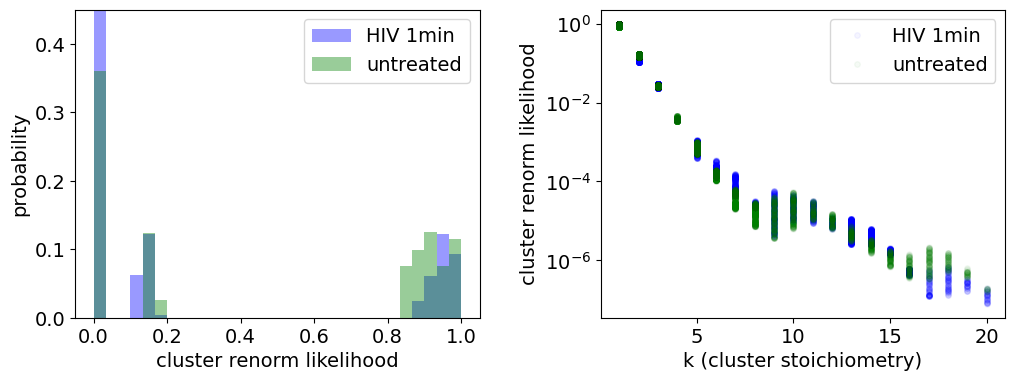

In [85]:
fig, (((ax1, ax2))) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))   # 4 subplots

# Histograms of renormalised likelihoods (excluding k=0, plotting histogram probabilities), 
# so likelihood of counting the stoichiometry we measured in each cluster, when we only look at areas with clusters:
# untreated and HIV data sets:
ax1.hist(likelih_renorm_3, bins=30, weights=weights_3, alpha=0.4, color='blue', label=label_3)  # occurrences
ax1.hist(likelih_renorm_1, bins=30, weights=weights_1, alpha=0.4, color='green', label=label_1)  # occurrences
ax1.set(xlabel="cluster renorm likelihood", ylabel="probability")
#ax1.set_xlim([0,0.35]) # all data sets in same scale
ax1.set_ylim([0,0.45]) # all data sets in same scale
ax1.legend(loc="best")

# Re-normalised likelihood versus stoichiometry, untreated and HIV data sets:
ax2.semilogy(n_3, likelih_renorm_3, 'bo', ms=4, alpha=0.04, label=label_3)
ax2.semilogy(n_1, likelih_renorm_1, 'go', ms=4, alpha=0.04, label=label_1)
ax2.set(xlabel="k (cluster stoichiometry)", ylabel="cluster renorm likelihood")
ax2.legend(loc="best")
#ax2.set_xlim([0,0.35]) # all data sets in same scale
#ax2.set_ylim([0.0001,1.5])

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

Show some likelihoods?

**SOME OBSERVATIONS:**

**Comparison of stoichiometry data with expected averaged Poisson distributions for our cluster sizes**: 

- (i) reasonably good for untreated cells and experiment minus theory shows there is perhaps some pre-clustering of CD4 (in absence of virus) compared to the expected chance co-localisation from the theoretical Poisson distributions, 
- (ii) extra clusters at stoichiometry ~2-4 for PMA data and multiple large clusters (clathrin-coated pits?), 
- (iii) clear extra clusters at stoichiometry $\sim 13-16~$ for **HIV data** (clear peak). Can relate to mean number of approx. 10 HIV Env spikes per virus on average (~30 Env molecules, probably some spikes are not close to binding sites, or not all 3 Env molecules engage CD4 in each spike). It's of correct order of magnitude. 

**Peak** on histogram of **cluster diameters** (or area) seen for **HIV data** at around $\sim 175-215$ nm diameter. Peak is not there for untreated data. Peak in HIV data corresponds to peak in area $\sim 0.025-0.035 ~\mu \mathrm{m}$, which corresponds exactly with the peak in the stoichiometry probability distribution at $\sim 13-17$ CD4 molecules. Most of the clusters with $\sim 13-17$ molecules for the HIV data have a density $\sim 500 ~\mathrm{molecs}/\mu \mathrm{m}^2$.

For all data sets, **receptor number densities** seem all around $\sim 500 ~\mathrm{molecs}/\mu \mathrm{m}^2$ at stoichiometries $\sim 10-20$, with a higher peak of $\sim 800-900 ~\mathrm{molecs}/\mu \mathrm{m}^2$ around a stoichiometry of ~5-7 molecules.

Considering a CD4 size of approx. ~3 nm, the measured densities correspond to **inter-particle distances** of **40-50 nm** on average (twice radius of circle corresponding to the area per molecule) .

The fact that these densities are larger than the input whole-cell density, $n = 200 ~\mathrm{molecs}/\mu \mathrm{m}^2$, is expected, as we typically exclude exclude some empty space when looking at clusters, compared to the overall whole-cell number density (no. molecs/whole cell area). 

The theoretical model is an approximation and describes what we would expect if we had a random distribution of receptors on the cell surface and then chose to measure in certain areas. In our experimental data, there is a bias in the choise of our areas, as the image processing that identifies clusters will likely choose a tightly packed area around where receptors are found, excluding empty space, which is a bit different to counting in a pre-set area. By adjusting the normalisation of the stoichiometry distributions to remove the peak at k=0 (0 molecules) from the theoretical probability distributions, we correct the part of the bias that comes from the fact that experiments only look at regions with clusters, and exclude regions with no clusters. But some bias from the way the area of a cluster is estimated (tightly packed around clusters, not circular) most likely remains. This could be estimated perhaps with synthetic images...  

There seems to be a somewhat **increased packing of receptors in clusters with 3-9 CD4 molecules**. This could be related to dimerisation of CD4 and possibly to the presence of CD4 in lipid rafts (still controversial), which might have a limiting size. Could it also be an artefact of the cluster-findng algorithm, that some small clusters are tight and sometimes small clusters are "joined" with empty space between them so that the density is lower for larger clusters? Could be related to the "definition" of cluster in the analysis?

For the **PMA data set**, there seems to be a **saturation of the cluster size** at a diameter of ~800 nm (cluster area of 0.5 um^2). **Technical limitation or biological interpretation?** 
For the PMA data, the large cluster stoichiometries are probably due to clathrin-coated pits (PMA estimulates this), (and perhaps even endocytosed) and large numbers not surprising according to MM.

**The HIV data, compared to the untreated data, shows: less monomers, slightly more clusters with k=2,3 molecules, significantly more clusters with k>3 molecules**: 
- For the **untreated data set**, **49%** of measured clusters are **monomers**, **15 %** have 2 molecules, **6%** have 3 molecules, and **30%** have 4 or more molecules.
- For the **HIV data set**, only **30%** of measured clusters are **monomers**, **19 %** have 2 molecules, **8%** have 3 molecules, and **43%** have 4 or more molecules. 
- In particular, the percentage of clusters with **13-16 molecules** is ~17% when HIV is present, whereas this is only ~4% in the untreated cells. So **we measure a ~4-fold increase in the fraction of clusters with 13-16 molecules when HIV is present.**

The model is somewhat sensitive to the $n$ parameter (whole-cell receptor number density), as expected. In Sup-T1 cells, from literature, we expect $n \sim 100-300 ~\mathrm{molecs}/\mu \mathrm{m}^2$. Using $n = 200 ~\mathrm{molecs}/\mu \mathrm{m}^2$ or $n = 300 ~\mathrm{molecs}/\mu \mathrm{m}^2$, produces theoretical stoichiometry distributions that agree well with the untreated one. When counting the numbers of molecules (SR) per entire ROI measured in all cells, the obtained experimental number densities for the cells measured are around $n = 60 ~\mathrm{molecs}/\mu \mathrm{m}^2$. Using this for the theoretical distribution, the discrepancy between theory and distributions is larger, and could be interpreted as having more pre-clustering (in absence of HIV) in the untreated cells.

Showing the experimental stoichiometry data with **bins of width 1** instead of bins with larger widths shows the effects more clearly and also is more appropriate since we compare to **discrete** Poisson distributions.

# Save package requirements file

In [86]:
# Save package requirements file if needed
!pip freeze > requirements.txt